# Developed by Jonathan Ojeda 29/1/2021 QAAFI UQ
_**Functionalities:**_
* Read netCDF using xarray
* Explore and plot multidimensional files using xarray 
* Create maps using xarray and dataframes
* Create 2D dataframe from xarray
* Create Multi-dimensional xarray from 2D pandas dataframe
* Plot heatmaps using environmental variables

In [1]:
#Import required packages
import os
os.environ["PROJ_LIB"] = r'C:\Users\uqjojeda\Anaconda3\Library\share'; #fixr
from netCDF4 import Dataset
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
import matplotlib.ticker as ticker
import glob
import geopandas as gpd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Tool to minimize code and see only figures
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# Description of outputs generated by pSIMSV2

* run005 --> harvesting at 200 DAS.
* run004 --> harvesting at 300 degre days after flowering.
* r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\output.nc4' --> harvesting at 150 DAS.
* run007 --> harvesting at 120 DAS.
* run008 --> harvesting at 120 DAS withouth crop mask.
* run012 --> harvesting at 120 DAS withouth crop mask, some variables of stress and remaining tiles in Texas were added.
* run013 --> harvesting at 120 DAS withouth crop mask, add partitioned variables for climate.
* run014 --> same than run013 but with a change in the irrigation routine
* run016 --> change in planting dates to corn planting date.
* run017 --> change in planting dates to corn planting and ET values were added as variables
* run019 --> new variable sowing date at 30 arc-minute resolution was added (this outputs was used to write the paper)

### Read and merge all nc4 files from pSIMSV2

_Note: if more than a file in a folder write *.nc4 at the end of the address_

In [40]:
df_final = xr.merge([xr.open_dataset(f, decode_times=False) for f in glob.glob(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\new\run019\output.nc4')])

### Write a nc4 file

_Note: this is useful when several nc files were merged in the previous code_

In [5]:
#df_final.to_netcdf(r'C:/Users/uqjojeda/Nextcloud/PURTERRA-A0131/2020/outputs/new/run00/all_final.nc')

### Explore nc4 file (xarray data explanation)

_Coordinates and Dimensions:_

* `irr`: irrigation treatments (n=2) (1=rainfed, 2=irrigated under non water limitations),
* `lat`: latitudes (n=52),
* `lon`: longitudes (n=72),
* `scen_new`: cultivar (n=4) (GS (grain sorghum), SS (sudangrass sorghum), PS (photosensitive sorghum) and PI (photoinsensitive sorghum))
* `time`: years (n=30) (from 1980 to 2009, i.e. year number 1 is 1980)

_Data Variables:_ Here we have 41 variables which are the APSIM outputs specified in the parameter file in pSIMSV2.

In [15]:
df_final

<xarray.Dataset>
Dimensions:          (irr: 2, lat: 52, lon: 72, scen_new: 4, time: 30)
Coordinates:
  * irr              (irr) int32 1 2
  * lat              (lat) float64 49.75 49.25 48.75 48.25 ... 25.25 24.75 24.25
  * lon              (lon) float64 -107.8 -107.2 -106.8 ... -73.25 -72.75 -72.25
  * time             (time) int32 1 2 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29 30
Dimensions without coordinates: scen_new
Data variables:
    DOY              (time, scen_new, irr, lon, lat) float32 ...
    DaysAfterSowing  (time, scen_new, irr, lon, lat) float32 ...
    ESW1av           (time, scen_new, irr, lon, lat) float32 ...
    FloweringDAS     (time, scen_new, irr, lon, lat) float32 ...
    IrrigationIn     (time, scen_new, irr, lon, lat) float32 ...
    LeafNo           (time, scen_new, irr, lon, lat) float32 ...
    MaxLAI           (time, scen_new, irr, lon, lat) float32 ...
    N_stress_expan   (time, scen_new, irr, lon, lat) float32 ...
    N_stress_photo   (time, scen_new, irr, lon, lat) float32 ...
    PAWC             (time, scen_new, irr, lon, lat) float32 ...
    RadiationIn      (time, scen_new, irr, lon, lat) float32 ...
    RainIn           (time, scen_new, irr, lon, lat) float32 ...
    TempIn           (time, scen_new, irr, lon, lat) float32 ...
    WU               (time, scen_new, irr, lon, lat) float32 ...
    aMaxT            (time, scen_new, irr, lon, lat) float32 ...
    aMinT            (time, scen_new, irr, lon, lat) float32 ...
    actual_ET        (time, scen_new, irr, lon, lat) float32 ...
    biomass          (time, scen_new, irr, lon, lat) float32 ...
    planting_date    (time, scen_new, irr, lon, lat) float32 ...
    potential_ET     (time, scen_new, irr, lon, lat) float32 ...
    rad40DAS         (time, scen_new, irr, lon, lat) float32 ...
    rad80DAS         (time, scen_new, irr, lon, lat) float32 ...
    radHarv          (time, scen_new, irr, lon, lat) float32 ...
    rain40DAS        (time, scen_new, irr, lon, lat) float32 ...
    rain80DAS        (time, scen_new, irr, lon, lat) float32 ...
    rainHarv         (time, scen_new, irr, lon, lat) float32 ...
    ri0_40           (time, scen_new, irr, lon, lat) float32 ...
    ri40_80          (time, scen_new, irr, lon, lat) float32 ...
    ri80_harv        (time, scen_new, irr, lon, lat) float32 ...
    scen             (scen_new) int32 ...
    sw0_40           (time, scen_new, irr, lon, lat) float32 ...
    sw40_80          (time, scen_new, irr, lon, lat) float32 ...
    sw80_harv        (time, scen_new, irr, lon, lat) float32 ...
    sw_stress_expan  (time, scen_new, irr, lon, lat) float32 ...
    sw_stress_photo  (time, scen_new, irr, lon, lat) float32 ...
    temp40DAS        (time, scen_new, irr, lon, lat) float32 ...
    temp80DAS        (time, scen_new, irr, lon, lat) float32 ...
    tempHarv         (time, scen_new, irr, lon, lat) float32 ...
    tp0_40           (time, scen_new, irr, lon, lat) float32 ...
    tp40_80          (time, scen_new, irr, lon, lat) float32 ...
    tp80_harv        (time, scen_new, irr, lon, lat) float32 ...

### Explore the shape of the nc4 file

In [16]:
df_final.biomass[0:,0:,0:,0:,0:].values.shape

(30, 4, 2, 72, 52)

### Visualise the nc4 file
Note: here we are seeing the irrigation applied during the growing season (`IrrigationIn`) for a given year (year number 26) across the study region.

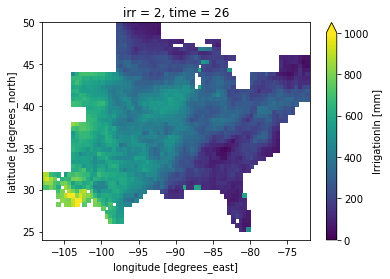

In [17]:
#use campaign nc file in run010
#use campaign file in created C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\data\campaign\created_campaign\test6 folder (this is the right one)
#for the following factor configuration:

#scen_new:0,irr:0 GS dry
#scen_new:1,irr:0 SS dry
#scen_new:2,irr:0 FSPS dry
#scen_new:3,irr:0 FS dry
#scen_new:0,irr:1 GS irrigated
#scen_new:1,irr:1 SS irrigated
#scen_new:2,irr:1 FSPS irrigated
#scen_new:3,irr:1 FS irrigated

df_final.IrrigationIn[25,3,1,0:,0:].plot(yincrease=True, x='lon', y='lat', vmin=0, vmax=1000)

# Arrange the multidimensional dataframe for the ENTIRE dataset (including crop failures)

In [41]:
data1 = df_final.where(df_final['biomass'] != -99)
#data2 = data1.where(data1['biomass'] < 0)
#Create biomass variable in t ha-1
data1['biomass2'] = data1['biomass']/1000
# Remove values considered as crop failures < quantile(0.025)
#data4 = df_final.where(df_final['biomass'] > 5922.5) #df.biomass.quantile(0.025)

#Remove lat and lon combinations that were outside the study area. For this we need to convert the xarray to a 2D dataframe
#Conver multidimendional frame to 2D frame
data2 = data1.to_dataframe()
data2.reset_index(drop=False, inplace=True)
data=data2.replace(-99,np.nan).dropna(axis = 0, how = 'any')
df = pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\Maps\SorghumMask\OutsideAreas.csv')
coordinate_list = [list(row) for row in df.values]
dropSet = {tuple(elem) for elem in coordinate_list}

# Creates a multi-index on letter/colour.
temp = data.set_index(['lat', 'lon'])
# Keep all elements of the index except those in droplist.
temp = temp.loc[list(set(temp.index) - dropSet)]
# Reset index to get the original column layout.
df_dropped = temp.reset_index()

#Rename
df_dropped.rename(columns={'scen_new':'cultivar'}, inplace=True)
#df_dropped.set_index(['lat', 'lon', 'cultivar', 'irr','time'], inplace=True)

#Remove cells with 0% of cropland accordingly with AgMERRA dataset
landuse = pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\landuse.csv')
data3 = pd.merge(landuse, df_dropped, how ='inner', on =['lat','lon']) 

#data2 = data3.drop(['rain_a_x','radn_a_x','rain_b_x','radn_b_x','rain_c_x','radn_c_x','wind_a_x','hur_a_x','hurtmax_a_x','cropland_a_x',
# 'tmax_a_x', 'tmin_a_x', 'tmean_a_x', 'wind_b_x', 'hur_b_x', 'hurtmax_b_x', 'cropland_b_x', 'tmax_b_x', 'tmin_b_x',
# 'tmean_b_x','wind_c_x', 'hur_c_x', 'hurtmax_c_x', 'cropland_c_x', 'tmax_c_x', 'tmin_c_x', 'tmean_c_x', 'radn_x',
# 'rain_x', 'tmin_x', 'tmax_x', 'tmean_x', 'wind_x', 'hur_x', 'hurtmax_x', 'env_x', 'rain_a_y', 'radn_a_y',
# 'rain_b_y', 'radn_b_y', 'rain_c_y', 'radn_c_y', 'wind_a_y', 'hur_a_y', 'hurtmax_a_y', 'cropland_a_y', 'tmax_a_y',
# 'tmin_a_y', 'tmean_a_y', 'wind_b_y', 'hur_b_y','hurtmax_b_y', 'cropland_b_y', 'tmax_b_y', 'tmin_b_y', 'tmean_b_y',
# 'wind_c_y', 'hur_c_y', 'hurtmax_c_y', 'cropland_c_y', 'tmax_c_y', 'tmin_c_y', 'tmean_c_y', 'radn_y', 'rain_y',
# 'tmin_y', 'tmax_y', 'tmean_y', 'wind_y', 'hur_y', 'hurtmax_y', 'cropland_y', 'env_y'], axis=1)

#Set index before to create the xarray
data5 = data3.set_index(['lat','lon','cultivar','irr','time'])

#From 2D dataframe to xarray
data4 = data5.to_xarray()
#remove data from West Virginia state which was out of bioenergy crop mask
#d1 = dataPre3.where(dataPre3.biomass != dataPre3.biomass[0:,0:,0:,52,24], drop=True)

### Conver multidimendional dataframe to 2D dataframe

In [42]:
data4pd = data4.to_dataframe()
dfc = data4pd[data4pd.biomass != 0]
dfc.reset_index(level=[0,1,2,3], inplace=True)
dfc.rename(columns={'scen_new':'cultivar'}, inplace=True)
df = dfc.dropna()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Remove `-99` values and calculate the quantile `0.025`

Note: for this study any value less than quantile 0.025 was considered a crop failure

In [43]:
df2 = df[df['biomass'] != -99]
df2.biomass.quantile(0.025)

5789.51259765625

In [9]:
# all_failures_spatial00 = all_failures_spatial0.reset_index()
# all_failures_spatial00.FailureRisk.max()
# all_failures_spatial00[all_failures_spatial00['FailureRisk'] > 80]

In [10]:
# mean_f = failures.groupby(['cultivar', 'irr'],as_index=False).count()
# mean_f 

In [11]:
# mean = df.groupby(['cultivar','irr','time'],as_index=False).count()
# mean

In [12]:
# df2.shape
# 93/309154*100

# Crop failure analysis before to do the general analysis

Here a new dataframe is created to explore variables associated with the crop failures. The crop failure risk is calculated as the number of failures / 30 years.

In [51]:
df2 = df[df['sw80_harv'] != -99]
failures = df2[df2['biomass'] < 5789.0874]

mean_failures0 = failures.groupby(['lat', 'lon','cultivar','irr','RainIn','TempIn','aMinT','RadiationIn','ri0_40','ri40_80','ri80_harv','radHarv','aMaxT'],as_index=False).mean()
mean_failures = mean_failures0[['lat','lon','cultivar','irr','biomass2','RainIn','TempIn','aMinT','RadiationIn','ri0_40','ri40_80','ri80_harv','radHarv','aMaxT']]
count_failures0 = failures.groupby(['lat', 'lon','cultivar','irr'],as_index=False).count()
count_failures = count_failures0[['lat','lon','cultivar','irr','biomass2']]
count_failures.rename(columns={'biomass2':'NoFailures'}, inplace=True)
count_failures['years'] = 30

#Failure risk calculation
count_failures['FailureRisk'] = count_failures['NoFailures']/count_failures['years']*100
all_failures = pd.merge(mean_failures, count_failures, how ='inner', on =['lat','lon','irr','cultivar'])

#Write name of the genotypes
all_failures.loc[all_failures.cultivar == 0, 'cv'] = "GS"
all_failures.loc[all_failures.cultivar == 1, 'cv'] = "SS"
all_failures.loc[all_failures.cultivar == 2, 'cv'] = "PS"
all_failures.loc[all_failures.cultivar == 3, 'cv'] = "PI"

#Write names of the irrigation strategies
all_failures.loc[all_failures.irr == 1, 'irri'] = "R"
all_failures.loc[all_failures.irr == 2, 'irri'] = "I"

all_failures_spatial00 = all_failures.reset_index()
all_failures_spatial000 = all_failures_spatial00.drop(['index'], axis=1)
all_failures_spatial0000 = all_failures_spatial000.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#remove outliers in the irrigated database
all_failures_spatial2 = all_failures_spatial0000.drop(all_failures_spatial0000.index[[48,50,52,54,76,78,80,82,195,200,358,360,362]])
all_failures_spatial0 = all_failures_spatial2.set_index(['lat','lon','cultivar','irr'])
all_failures_spatial = all_failures_spatial0.to_xarray()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-51-acf677e03cae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_failures['years'] = 30
<ipython-input-51-acf677e03cae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

### Explore 2D dataframe of crop failures

In [52]:
all_failures_spatial0.head()

biomass2      RainIn  TempIn      aMinT  \
lat   lon    cultivar irr                                            
26.25 -98.25 0        1      4.9679  106.449997  30.142  24.070999   
             1        1      4.9880  106.449997  30.142  24.070999   
             2        1      4.7977  106.449997  30.142  24.070999   
             3        1      5.0712  106.449997  30.142  24.070999   
      -97.75 0        1      1.6714  209.574997  30.146  25.256001   

                           RadiationIn  ri0_40     ri40_80   ri80_harv  \
lat   lon    cultivar irr                                                
26.25 -98.25 0        1    2756.195068     0.0  199.925003  727.064026   
             1        1    2756.195068     0.0  118.871002  720.172974   
             2        1    2756.195068     0.0   13.729000  571.288025   
             3        1    2756.195068     0.0  170.710999  695.450012   
      -97.75 0        1    2739.600098     0.0    0.000000  132.468002   

                              radHarv      aMaxT  NoFailures  years  \
lat   lon    cultivar irr                                             
26.25 -98.25 0        1    817.122009  36.213001           3     30   
             1        1    817.122009  36.213001           3     30   
             2        1    817.122009  36.213001           3     30   
             3        1    817.122009  36.213001           2     30   
      -97.75 0        1    771.952026  35.035000           2     30   

                           FailureRisk  cv irri  
lat   lon    cultivar irr                        
26.25 -98.25 0        1      10.000000  GS    R  
             1        1      10.000000  SS    R  
             2        1      10.000000  PS    R  
             3        1       6.666667  PI    R  
      -97.75 0        1       6.666667  GS    R

### Explore multidimensional dataframe of crop failures with xarray

In [53]:
all_failures_spatial

<xarray.Dataset>
Dimensions:      (cultivar: 4, irr: 2, lat: 43, lon: 64)
Coordinates:
  * lat          (lat) float64 26.25 26.75 28.75 29.25 ... 47.75 48.25 48.75
  * lon          (lon) float64 -103.8 -103.2 -102.8 ... -73.25 -72.75 -72.25
  * cultivar     (cultivar) int64 0 1 2 3
  * irr          (irr) int64 1 2
Data variables:
    biomass2     (lat, lon, cultivar, irr) float32 nan nan nan ... nan nan nan
    RainIn       (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    TempIn       (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    aMinT        (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    RadiationIn  (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    ri0_40       (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    ri40_80      (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    ri80_harv    (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    radHarv      (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    aMaxT        (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    NoFailures   (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    years        (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    FailureRisk  (lat, lon, cultivar, irr) float64 nan nan nan ... nan nan nan
    cv           (lat, lon, cultivar, irr) object nan nan nan ... nan nan nan
    irri         (lat, lon, cultivar, irr) object nan nan nan ... nan nan nan

In [55]:
#all_failures_spatial2 = all_failures_spatial0.reset_index()
#all_failures_spatial2.loc[(all_failures_spatial2['irri'] == 'I') & (all_failures_spatial2['lat'] < 37)]

### Export failures as nc4 file (optional)

In [ ]:
#all_failures_spatial.to_netcdf(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\Maps\Failures\failures.nc4')

### Map crop failures by irrigation strategy and genotype across the US

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-56-f89174b34f04>:119: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


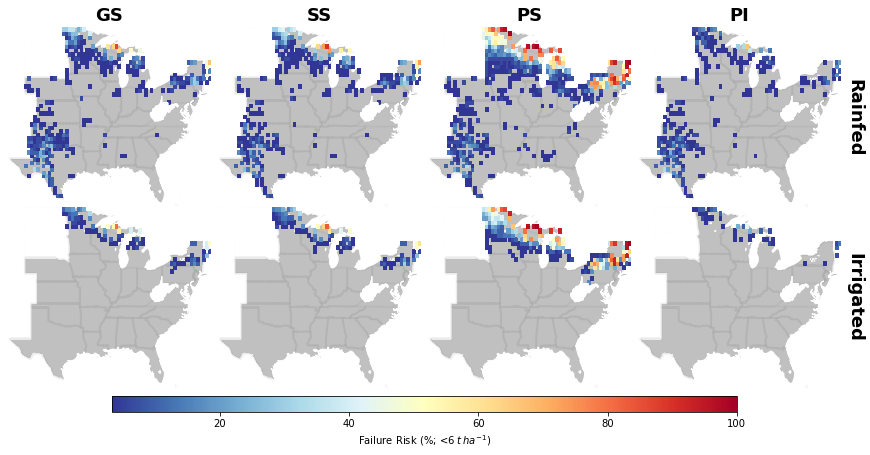

In [56]:
map_proj = ccrs.Mercator(central_longitude=-95)

p = all_failures_spatial.FailureRisk.plot(x='lon', y='lat', row='irr', col='cultivar',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj},
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=5, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1, linewidth =0, edgecolor =None,
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =1, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =1, edgecolor = "white",
                                  label=n.attributes['postal'])
    return ax

iso4 = ['NM','CO','WY','ND','SD','MT','VT','NH','MA','RI','CT']

def area3(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =0.5, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =0.5, edgecolor = "white",
                                  label=n.attributes['postal'])
    return ax

iso5 = ['WV']

def area4(ax, iso, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor='silver', zorder=z,
                                  alpha = 1.00, linewidth =0.5, edgecolor = "grey",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor='silver',
                                  alpha = 0.1, linewidth =2, edgecolor = "grey",
                                  label=n.attributes['postal'])
    return ax

iso6 = ['TX','OK','KS','NE','IA','MN','WI','OH','PA','NY',
        'NC','SC','GA','FL','AL','MS','LA','AR','MO','IL','IN','KY','TN','NJ']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=0.5,zorder=1)
    ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.5, zorder=1, color='silver')
    ax.add_feature(cfeature.OCEAN, color='white',edgecolor = "grey", zorder=2)
    ax.add_feature(cfeature.LAKES, color='white',edgecolor = "grey", linewidth=0.5, zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "grey", linewidth=0.2)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")
    
    for value in iso5 :
        area3(ax, value, "white", 6)

    area3(ax, value, "white", 6)
    
    for value in iso6 :
        area4(ax, value, 1)

    area4(ax, value, 1)

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='Failure Risk (%; <6 $t\,ha^{-1}$)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\NoFailures.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

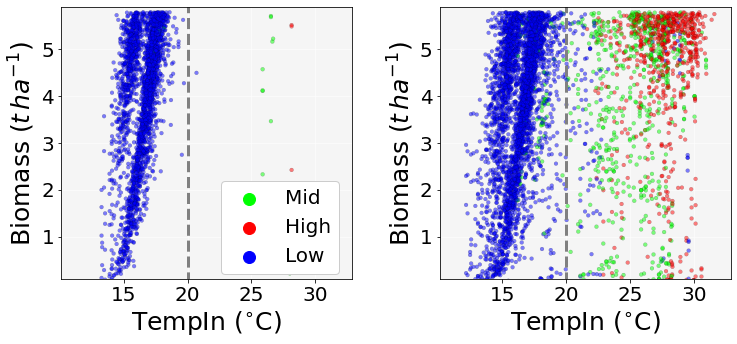

In [15]:
#Read dataframe with env names
X= pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\dfenv2.csv')

color_dict = dict({'High': '#ff0101','Mid':'#00ff01','Low':'#0000fe'})

#Merge current dataset to include envs
new = pd.merge(X, all_failures, how ='inner', on =['lat','lon']) 

dry = new[new['irri'] == 'R']
irri = new[new['irri'] == 'I']

kwargs  =   {'edgecolor':"k"}
fig = plt.figure(figsize=(12,5))

ax=plt.subplot(1, 2, 1)
sns.scatterplot(x="TempIn_y", y="biomass2",hue='env_name', alpha=0.5, data=irri, linewidth=0.2,**kwargs,s=15, palette=color_dict)

# Formatting graph and background
plt.legend(prop=dict(size=20),bbox_to_anchor=(0.55, 0.36), loc=2, borderaxespad=0., ncol=1,framealpha=1,markerscale=2)
plt.ylabel('Biomass ($t\,ha^{-1}$)', fontsize =25)
plt.xlabel('TempIn ($^{\circ}$C)', fontsize =25)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([10.1,32.9])
ax.set_ylim([0.1,5.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
#ax.get_legend().remove()
#ax.set_title('a',fontsize= 30,weight='bold')
plt.plot([20,20],[0,6],"--",color="grey", linewidth=3,zorder=1)

ax=plt.subplot(1, 2, 2)

sns.scatterplot(x="TempIn_y", y="biomass2", hue='env_name', alpha=0.5, data=dry, linewidth=0.2,**kwargs,s=15, palette=color_dict)

# Formatting graph and background
plt.legend(prop=dict(size=12),bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., ncol=1,framealpha=1,markerscale=2)
plt.ylabel('Biomass ($t\,ha^{-1}$)', fontsize =25)
plt.xlabel('TempIn ($^{\circ}$C)', fontsize =25)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([10.1,32.9])
ax.set_ylim([0.1,5.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.get_legend().remove()
#ax.set_title('b',fontsize= 30,weight='bold') 
plt.plot([20,20],[0,6],"--",color="grey", linewidth=3,zorder=1)

# ax=plt.subplot(1, 3, 3)
# temp = dry[dry['TempIn'] > 20]
# kwargs  =   {'edgecolor':"k"}
# sns.scatterplot(x="ri80_harv", y="biomass2",hue='cv', alpha=0.7, data=temp, linewidth=0.2,**kwargs,s=50, palette='Set1')

# # Formatting graph and background
# plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 0.99), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
# plt.ylabel('Biomass ($t\,ha^{-1}$)', fontsize =18)
# plt.xlabel('IRad 80-Harvest ($MJ\,m^{-2}$)', fontsize =18)
# ax = plt.gca()
# ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
# ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
# ax.patch.set_facecolor('0.96')
# ax.set_axisbelow(True)
# ax.yaxis.set_tick_params(labelsize=15)
# ax.xaxis.set_tick_params(labelsize=15)
# #ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
# #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
# #ax.set_xlim([9.9,34.9])
# #ax.set_ylim([100.1,159.9])
# plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
# plt.tick_params(axis='y',which='both',left=True)
# #ax.get_legend().remove()
# ax.set_title('c',fontsize= 30,weight='bold') 
####################################################################
plt.subplots_adjust(wspace=0.3, hspace=0)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\Failures.png', dpi=600, bbox_inches='tight', pad_inches=0)

In [16]:
new.describe()

lat          lon       rain_a       radn_a       rain_b  \
count  7728.000000  7728.000000  7728.000000  7728.000000  7728.000000   
mean     43.423331   -87.721920   173.234744  1338.855795   210.466624   
std       4.850143     9.449945    40.167640   116.724012    41.973984   
min      26.250000  -103.750000    58.926211  1209.116175    80.248247   
25%      42.250000   -95.750000   144.157204  1248.961440   187.180122   
50%      44.750000   -88.750000   166.958843  1328.430226   219.356815   
75%      46.750000   -78.250000   205.069577  1344.355725   240.801421   
max      48.750000   -72.250000   298.696075  1763.319951   315.303088   

            radn_b       rain_c       radn_c       wind_a        hur_a  ...  \
count  7728.000000  7728.000000  7728.000000  7728.000000  7728.000000  ...   
mean   1491.198921   189.339091   943.790340     2.030136    65.715046  ...   
std     101.478748    39.309519   137.896050     1.050821    10.182515  ...   
min    1361.299861    67.228316   808.187855     0.613278    25.158667  ...   
25%    1418.013543   162.910605   862.506431     0.805429    60.939922  ...   
50%    1480.802148   196.887259   893.445734     2.172683    69.734460  ...   
75%    1501.548764   217.830072   929.773771     3.141708    72.400170  ...   
max    1797.156736   293.746667  1343.308246     3.958473    81.918330  ...   

           aMinT_y  RadiationIn_y     ri0_40_y    ri40_80_y  ri80_harv_y  \
count  7728.000000    7728.000000  7728.000000  7728.000000  7728.000000   
mean     12.121772    2135.405221    10.667896   196.637773   290.805064   
std       3.778846     309.491348    33.247211   173.636409   149.138538   
min       6.592000    1260.363037     0.000000     0.000000     0.000000   
25%       9.910000    1937.717010     0.445000    59.024000   193.468246   
50%      10.906500    2060.808960     1.150000   155.728500   297.456512   
75%      12.127500    2218.139893     5.389250   290.278259   389.548241   
max      25.256001    3066.198975   308.540985   923.609985   877.395996   

         radHarv_y      aMaxT_y   NoFailures   years  FailureRisk  
count  7728.000000  7728.000000  7728.000000  7728.0  7728.000000  
mean    525.603746    24.289902    12.548913    30.0    41.829710  
std     138.406667     4.645425     9.390411     0.0    31.301371  
min       7.999000    17.726000     1.000000    30.0     3.333333  
25%     448.177238    21.520750     4.000000    30.0    13.333333  
50%     497.356003    22.712000    11.000000    30.0    36.666667  
75%     567.096497    24.045000    21.000000    30.0    70.000000  
max     995.599976    38.230999    30.000000    30.0   100.000000  

[8 rows x 98 columns]

In [18]:
new[new['env_name'] == 'Mid'].shape

(701, 101)

In [22]:
all_failures_spatial0

biomass2      RainIn     TempIn      aMinT  \
lat   lon    cultivar irr                                               
26.25 -98.25 0        1      4.9679  106.449997  30.142000  24.070999   
             1        1      4.9880  106.449997  30.142000  24.070999   
             2        1      4.7977  106.449997  30.142000  24.070999   
             3        1      5.0712  106.449997  30.142000  24.070999   
      -97.75 0        1      1.6714  209.574997  30.146000  25.256001   
...                             ...         ...        ...        ...   
48.75 -93.75 1        2      4.9589  282.247009  15.627000   9.374000   
             2        1      4.4519  181.811005  16.653999   9.939000   
                      2      4.6787  207.287003  16.763000  10.050000   
             3        1      3.8996  352.553986  14.941000   9.135000   
                      2      4.0396  360.627991  15.011000   9.191000   

                           RadiationIn  ri0_40     ri40_80   ri80_harv  \
lat   lon    cultivar irr                                                
26.25 -98.25 0        1    2756.195068   0.000  199.925003  727.064026   
             1        1    2756.195068   0.000  118.871002  720.172974   
             2        1    2756.195068   0.000   13.729000  571.288025   
             3        1    2756.195068   0.000  170.710999  695.450012   
      -97.75 0        1    2739.600098   0.000    0.000000  132.468002   
...                                ...     ...         ...         ...   
48.75 -93.75 1        2    2115.399902   4.066  113.134003  448.804993   
             2        1    2286.168945   0.812  153.970993  324.279999   
                      2    2301.768066   0.688  152.059998  347.687012   
             3        1    2091.300049   4.645  349.730011   58.035000   
                      2    2101.000000   3.837  324.154999   95.810997   

                              radHarv      aMaxT  NoFailures  years  \
lat   lon    cultivar irr                                             
26.25 -98.25 0        1    817.122009  36.213001           3     30   
             1        1    817.122009  36.213001           3     30   
             2        1    817.122009  36.213001           3     30   
             3        1    817.122009  36.213001           2     30   
      -97.75 0        1    771.952026  35.035000           2     30   
...                               ...        ...         ...    ...   
48.75 -93.75 1        2    562.700012  21.881001           9     30   
             2        1    559.395996  23.368999          29     30   
                      2    564.122009  23.476000          26     30   
             3        1    495.700012  20.747000           5     30   
                      2    508.100006  20.830999           4     30   

                           FailureRisk  cv irri  
lat   lon    cultivar irr                        
26.25 -98.25 0        1      10.000000  GS    R  
             1        1      10.000000  SS    R  
             2        1      10.000000  PS    R  
             3        1       6.666667  PI    R  
      -97.75 0        1       6.666667  GS    R  
...                                ...  ..  ...  
48.75 -93.75 1        2      30.000000  SS    I  
             2        1      96.666667  PS    R  
                      2      86.666667  PS    I  
             3        1      16.666667  PI    R  
                      2      13.333333  PI    I  

[1812 rows x 15 columns]

lat     lon  cultivar  irr  biomass2      RainIn     TempIn      aMinT  \
48   29.75  -99.75         0    2    1.8579  116.302002  28.007000  21.219000   
50   29.75  -99.75         1    2    1.5011  116.302002  28.007000  21.219000   
52   29.75  -99.75         2    2    0.2140  116.302002  28.007000  21.219000   
54   29.75  -99.75         3    2    2.0261  116.302002  28.007000  21.219000   
76   30.75 -100.25         0    2    4.1076  134.977005  25.879999  19.652000   
78   30.75 -100.25         1    2    4.1223  134.977005  25.879999  19.652000   
80   30.75 -100.25         2    2    2.3297  134.977005  25.879999  19.652000   
82   30.75 -100.25         3    2    4.5720  134.977005  25.879999  19.652000   
195  33.25 -102.75         2    2    5.1622  133.570007  26.642000  19.445999   
200  33.25 -102.25         2    2    5.2235  141.675003  26.701000  19.618000   
358  34.75  -99.75         0    2    5.5152  159.020004  28.148001  21.025000   
360  34.75  -99.75         1    2    5.4860  159.020004  28.148001  21.025000   
362  34.75  -99.75         2    2    2.4228  159.020004  28.148001  21.025000   

     RadiationIn  ri0_40  ri40_80   ri80_harv     radHarv      aMaxT  \
48   2904.312988     0.0    0.000  174.895996  982.952026  34.794998   
50   2904.312988     0.0    0.000  106.968002  982.952026  34.794998   
52   2904.312988     0.0    0.000   11.206000  982.952026  34.794998   
54   2904.312988     0.0    0.000  150.932007  982.952026  34.794998   
76   2661.458984     0.0    0.250  438.920013  910.021973  32.108002   
78   2661.458984     0.0    0.099  374.009003  910.021973  32.108002   
80   2661.458984     0.0    0.032  148.388000  910.021973  32.108002   
82   2661.458984     0.0    0.194  413.734985  910.021973  32.108002   
195  2922.941895     0.0    0.653  351.455994  815.471985  33.839001   
200  2913.094971     0.0    0.682  357.380005  808.273010  33.784000   
358  2828.408936     0.0    3.063  495.511993  777.146973  35.271000   
360  2828.408936     0.0    1.112  423.518005  777.146973  35.271000   
362  2828.408936     0.0    0.129  164.647995  777.146973  35.271000   

     NoFailures  years  FailureRisk  cv irri  
48            2     30     6.666667  GS    I  
50            2     30     6.666667  SS    I  
52            2     30     6.666667  PS    I  
54            1     30     3.333333  PI    I  
76            1     30     3.333333  GS    I  
78            1     30     3.333333  SS    I  
80            1     30     3.333333  PS    I  
82            1     30     3.333333  PI    I  
195           1     30     3.333333  PS    I  
200           1     30     3.333333  PS    I  
358           1     30     3.333333  GS    I  
360           1     30     3.333333  SS    I  
362           1     30     3.333333  PS    I

In [19]:
701/7728*100

9.070910973084887

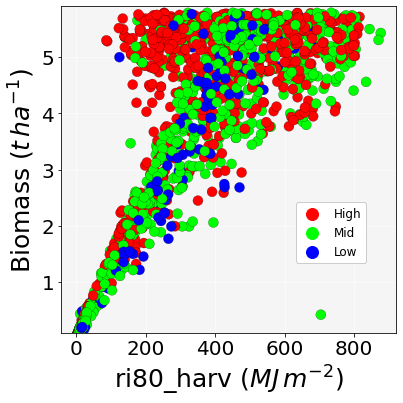

In [236]:
# 'ESW1av', 'FloweringDAS', 'IrrigationIn', 'N_stress_expan',
#        'N_stress_photo', 'PAWC', 'WU', 'actual_ET', 'biomass', 'planting_date',
#        'potential_ET', 'rad40DAS', 'rad80DAS', 'rain40DAS',
#        'rain80DAS', 'rainHarv','sw0_40', 'sw40_80', 'sw80_harv', 'sw_stress_expan', 'sw_stress_photo',
#        'temp40DAS', 'temp80DAS', 'tempHarv', 'tp0_40', 'tp40_80', 'tp80_harv',
#        'env', 'env_name', 'RainIn_y', 'TempIn_y', 'aMinT_y', 'RadiationIn_y',
#        'ri0_40_y', 'ri40_80_y', 'ri80_harv_y', 'radHarv_y', 'aMaxT_y',
#        'NoFailures', 'years', 'FailureRisk', 'cv', 'irri'],

dry_19 = dry[dry['TempIn_y'] > 20]
kwargs  =   {'edgecolor':"k"}
fig = plt.figure(figsize=(6,6))

ax=plt.subplot(1, 1, 1)
sns.scatterplot(x="ri80_harv_y", y="biomass2", hue='env_name', alpha=1, data=dry_19, linewidth=0.2,**kwargs,s=100, palette=color_dict)

# Formatting graph and background
plt.legend(prop=dict(size=12),bbox_to_anchor=(0.7, 0.4), loc=2, borderaxespad=0., ncol=1,framealpha=1,markerscale=2)
plt.ylabel('Biomass ($t\,ha^{-1}$)', fontsize =25)
plt.xlabel('ri80_harv ($MJ\,m^{-2}$)', fontsize =25)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.set_xlim([10.1,32.9])
ax.set_ylim([0.1,5.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
#ax.get_legend().remove()
#ax.set_title('b',fontsize= 30,weight='bold') 

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\fre2.png', dpi=600, bbox_inches='tight', pad_inches=0)

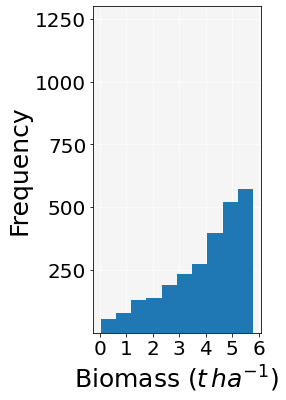

In [133]:
dry0 = failures[failures['irr'] == 1]
irri0 = failures[failures['irr'] == 2]

kwargs  =   {'edgecolor':"k"}
fig = plt.figure(figsize=(3,6))

ax=plt.subplot(1, 1, 1)
irri0.biomass2.plot.hist()

# Formatting graph and background
plt.legend(prop=dict(size=20),bbox_to_anchor=(1, 0.47), loc=2, borderaxespad=0., ncol=1,framealpha=1,markerscale=2)
plt.ylabel('Frequency', fontsize =25)
plt.xlabel('Biomass ($t\,ha^{-1}$)', fontsize =25)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(250))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_ylim([0.1,1299])
ax.get_legend().remove()
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\fre2.png', dpi=600, bbox_inches='tight', pad_inches=0)

In [ ]:
#df["irrigation"] = ["rainfed" if ele < 2 else "irrigated" for ele in df["cultivar"]]

## Working with clean dataset without failures

In [10]:
data1 = df_final.where(df_final['biomass'] != -99)
data2 = data1.where(data1['biomass'] > 5789.0874) # removing failures #df.biomass.quantile(0.025)
#Create biomass variable in t ha-1
data2['biomass2'] = data2['biomass']/1000
#Remove lat and lon combinations that were outside the study area. For this we need to convert the xarray to a 2D dataframe
#Conver multidimendional frame to 2D frame
data3 = data2.to_dataframe()
data3.reset_index(drop=False, inplace=True)
data=data3.replace(-99,np.nan).dropna(axis = 0, how = 'any')
df = pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\Maps\SorghumMask\OutsideAreas.csv')
coordinate_list = [list(row) for row in df.values]
dropSet = {tuple(elem) for elem in coordinate_list}

# Creates a multi-index on letter/colour.
temp = data.set_index(['lat', 'lon'])
# Keep all elements of the index except those in droplist.
temp = temp.loc[list(set(temp.index) - dropSet)]
# Reset index to get the original column layout.
df_dropped = temp.reset_index()

#Rename
df_dropped.rename(columns={'scen_new':'cultivar'}, inplace=True)
#df_dropped.set_index(['lat', 'lon', 'cultivar', 'irr','time'], inplace=True)

#Remove cells with 0% of cropland accordingly with AgMERRA dataset
landuse = pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\landuse.csv')
data3 = pd.merge(landuse, df_dropped, how ='inner', on =['lat','lon']) 

#data2 = data3.drop(['rain_a_x','radn_a_x','rain_b_x','radn_b_x','rain_c_x','radn_c_x','wind_a_x','hur_a_x','hurtmax_a_x','cropland_a_x',
# 'tmax_a_x', 'tmin_a_x', 'tmean_a_x', 'wind_b_x', 'hur_b_x', 'hurtmax_b_x', 'cropland_b_x', 'tmax_b_x', 'tmin_b_x',
# 'tmean_b_x','wind_c_x', 'hur_c_x', 'hurtmax_c_x', 'cropland_c_x', 'tmax_c_x', 'tmin_c_x', 'tmean_c_x', 'radn_x',
# 'rain_x', 'tmin_x', 'tmax_x', 'tmean_x', 'wind_x', 'hur_x', 'hurtmax_x', 'env_x', 'rain_a_y', 'radn_a_y',
# 'rain_b_y', 'radn_b_y', 'rain_c_y', 'radn_c_y', 'wind_a_y', 'hur_a_y', 'hurtmax_a_y', 'cropland_a_y', 'tmax_a_y',
# 'tmin_a_y', 'tmean_a_y', 'wind_b_y', 'hur_b_y','hurtmax_b_y', 'cropland_b_y', 'tmax_b_y', 'tmin_b_y', 'tmean_b_y',
# 'wind_c_y', 'hur_c_y', 'hurtmax_c_y', 'cropland_c_y', 'tmax_c_y', 'tmin_c_y', 'tmean_c_y', 'radn_y', 'rain_y',
# 'tmin_y', 'tmax_y', 'tmean_y', 'wind_y', 'hur_y', 'hurtmax_y', 'cropland_y', 'env_y'], axis=1)

#Set index before to create the xarray
data5 = data3.set_index(['lat','lon','cultivar','irr','time'])

#From 2D dataframe to xarray
data4 = data5.to_xarray()
#remove data from West Virginia state which was out of bioenergy crop mask
#d1 = dataPre3.where(dataPre3.biomass != dataPre3.biomass[0:,0:,0:,52,24], drop=True)

In [11]:
#Conver multidimendional frame to 2D frame
data4pd = data4.to_dataframe()
dfc = data4pd[data4pd.biomass != 0]
dfc.reset_index(level=[0,1,2,3], inplace=True)
dfc.rename(columns={'scen_new':'cultivar'}, inplace=True)
df = dfc.dropna()

In [ ]:
df.e

In [ ]:
df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


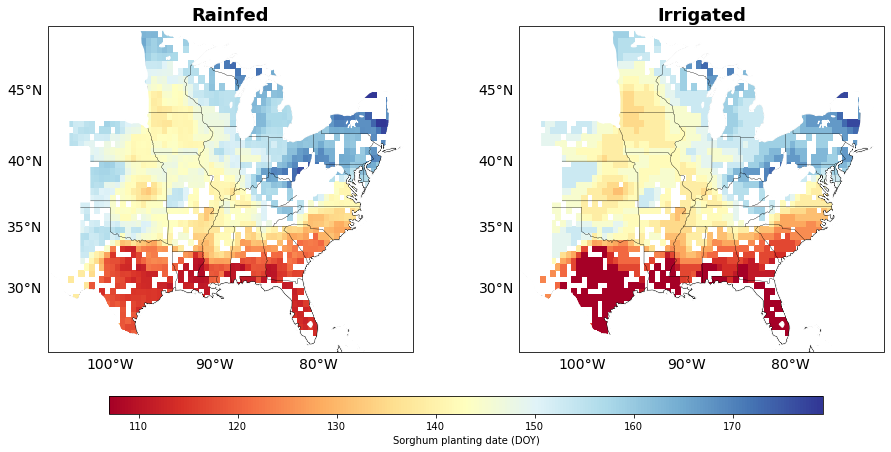

In [253]:
#Plotting mean biomass

map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.DOY.mean(dim=('time','cultivar'), skipna=True).plot(x='lon', y='lat', col='irr',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, #=a.biomass2.min(),vmax=a.biomass2.max(),
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("Rainfed", fontsize=18, fontweight="bold")
axes[1].set_title("Irrigated", fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=True,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
    ax.set_extent([-106, -71, 24.5, 49.2], crs=ccrs.PlateCarree())
    gl.xlabels_top = False
    gl.ylabels_right = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 14, 'color': 'k'}
    gl.ylabel_style = {'size': 14, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([-100,-90, -80, -70]) #
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45]) #
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.12, hspace=0.15)
p.add_colorbar(orientation='horizontal', pad=0.1, shrink=0.8, aspect=40, label='Sorghum planting date (DOY)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\mean_biomass0.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-259-e467f0cc7d38>:77: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


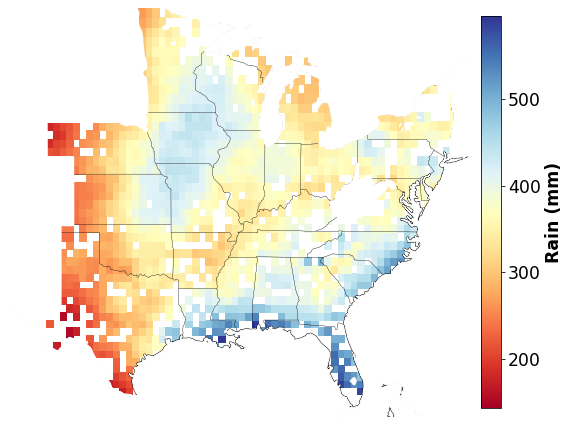

In [259]:
#Plotting single map with mean accum rain
a = df.groupby(['lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.RainIn.mean(dim=('time','cultivar','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu, add_colorbar=False, zorder=1, vmin=a.RainIn.quantile(0), vmax=a.RainIn.quantile(1))

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =1, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =3, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=False,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "white", color='white', linewidth=1)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

for value in iso4 :
    area2(ax, value, "white", 4)

area2(ax, value, "white", 4)

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rain (mm)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rain.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-260-652984902548>:77: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


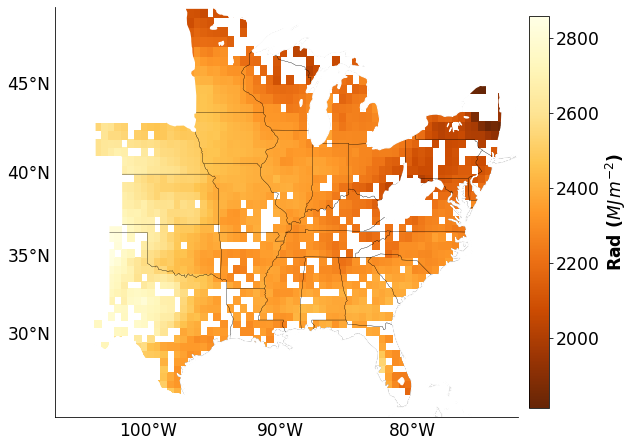

In [260]:
#Plotting single map with mean accum radiation
a = df.groupby(['lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.RadiationIn.mean(dim=('time','cultivar','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.YlOrBr_r, add_colorbar=False, zorder=1, vmin=a.RadiationIn.quantile(0), vmax=a.RadiationIn.quantile(1))

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=True,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=1)
ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "white", color='white', linewidth=1)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}

for value in iso4 :
    area2(ax, value, "white", 4)

area2(ax, value, "white", 4)

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rad ($MJ\,m^{-2}$)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rad.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-262-9058ba2c6802>:77: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


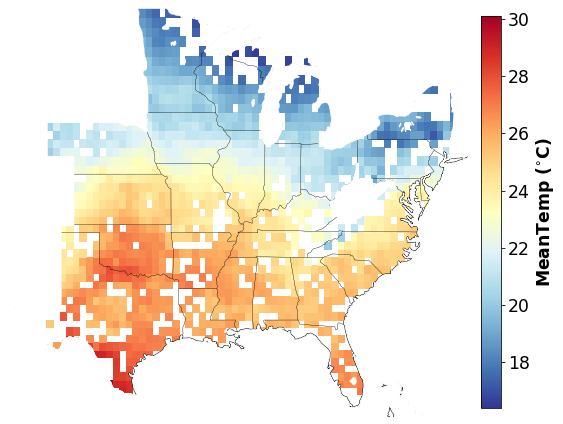

In [262]:
#Plotting single map with mean temperature during the growing cycle
a = df.groupby(['lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.TempIn.mean(dim=('time','cultivar','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu_r, zorder=1, add_colorbar=False, vmin=a.TempIn.quantile(0), vmax=a.TempIn.quantile(1))

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=False,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

for value in iso4 :
    area2(ax, value, "white", 4)

area2(ax, value, "white", 4)

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='MeanTemp ($^{\circ}$C)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\temp.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

# Plot intercepted radiation, tp and sw

In [264]:
#Select only dryland environments to calculate factors of stress
data5 = data4.where(data4['irr'] == 1)

In [278]:
a.ri40_80.max()

858.0178833007812

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-281-744ff3a8f7ed>:76: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


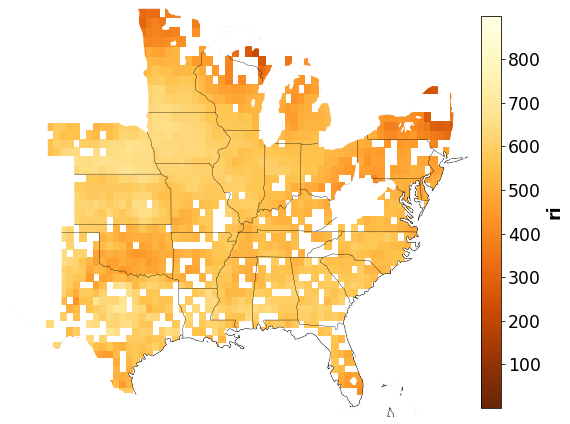

In [281]:
a = df.groupby(['lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data5.ri80_harv.mean(dim=('time','cultivar','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.YlOrBr_r, zorder=1, add_colorbar=False,vmin=0.1, vmax=899)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=False,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

for value in iso4 :
    area2(ax, value, "white", 4)

area2(ax, value, "white", 4)

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='ri', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)

plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\sw.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

# Plot multipanels by year

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-386-d4913f7d03fb>:60: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


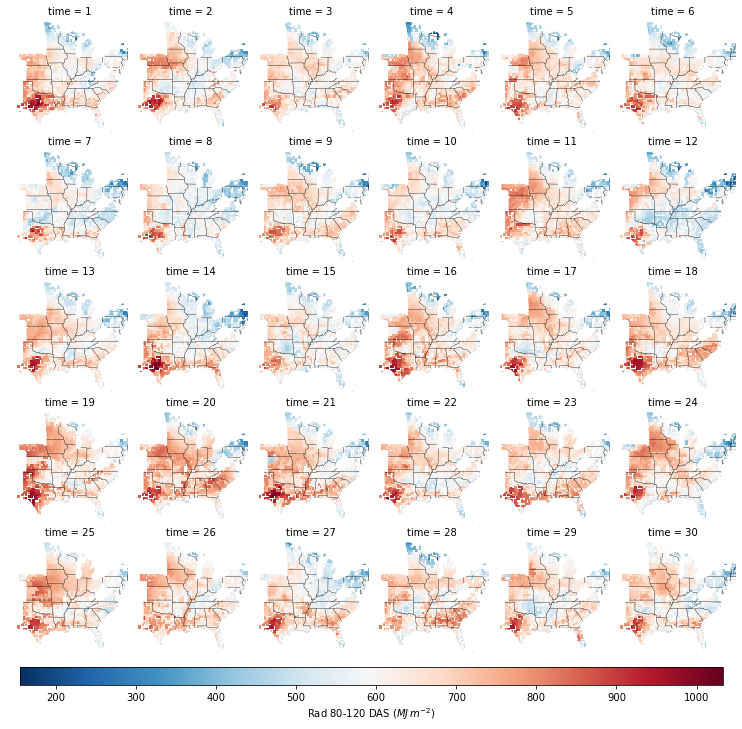

In [386]:
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.radHarv.mean(dim=('irr','cultivar'), skipna=True).plot(x='lon', y='lat',col='time', col_wrap=6,
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj},
    figsize=(18,14),
    cmap=mpl.cm.RdBu_r,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.7, hspace=0.17)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='Rad 80-120 DAS ($MJ\,m^{-2}$)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rad80-120.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-13-edbfc6181c3e>:93: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


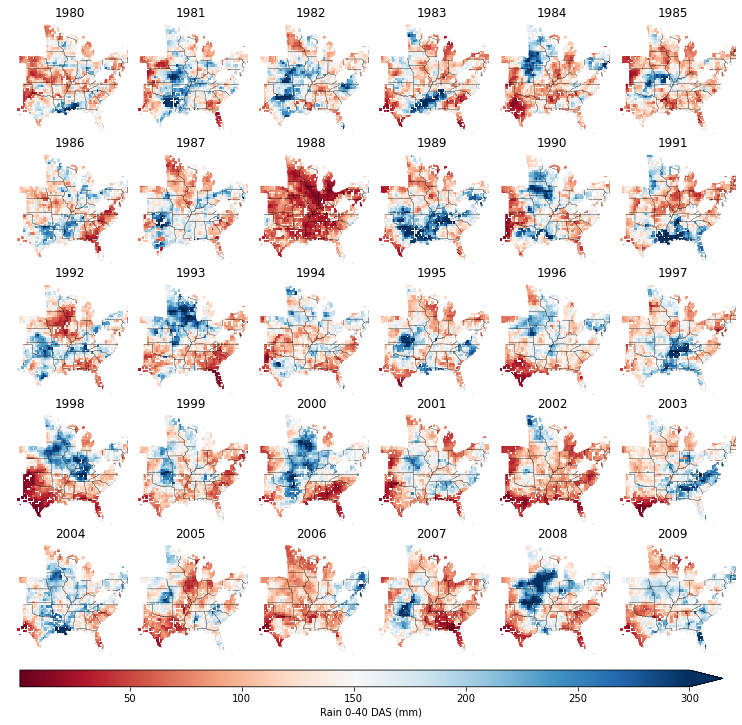

In [13]:
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.rain40DAS.mean(dim=('cultivar','irr'), skipna=True).plot(x='lon', y='lat', col='time', col_wrap=6,
    transform=ccrs.PlateCarree(central_longitude=0), vmax=300,
    subplot_kws={'projection': map_proj},
    figsize=(18,14),
    cmap=mpl.cm.RdBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("1980", fontsize=12)
axes[1].set_title("1981", fontsize=12)
axes[2].set_title("1982", fontsize=12)    
axes[3].set_title("1983", fontsize=12)
axes[4].set_title("1984", fontsize=12)
axes[5].set_title("1985", fontsize=12)
axes[6].set_title("1986", fontsize=12)
axes[7].set_title("1987", fontsize=12)
axes[8].set_title("1988", fontsize=12)
axes[9].set_title("1989", fontsize=12)
axes[10].set_title("1990", fontsize=12)
axes[11].set_title("1991", fontsize=12)
axes[12].set_title("1992", fontsize=12)
axes[13].set_title("1993", fontsize=12)
axes[14].set_title("1994", fontsize=12)
axes[15].set_title("1995", fontsize=12)
axes[16].set_title("1996", fontsize=12)
axes[17].set_title("1997", fontsize=12)
axes[18].set_title("1998", fontsize=12)
axes[19].set_title("1999", fontsize=12)
axes[20].set_title("2000", fontsize=12)
axes[21].set_title("2001", fontsize=12)
axes[22].set_title("2002", fontsize=12)
axes[23].set_title("2003", fontsize=12)
axes[24].set_title("2004", fontsize=12)
axes[25].set_title("2005", fontsize=12)
axes[26].set_title("2006", fontsize=12)
axes[27].set_title("2007", fontsize=12)
axes[28].set_title("2008", fontsize=12)
axes[29].set_title("2009", fontsize=12)

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.7, hspace=0.17)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='Rain 0-40 DAS (mm)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rad80-120.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-8-a50481eac153>:77: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


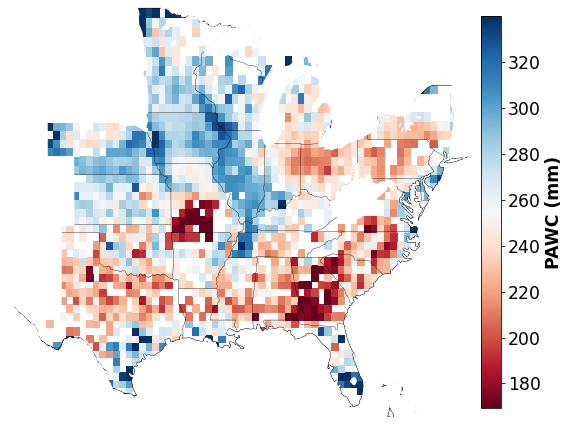

In [8]:
#Plotting single map with mean temperature during the growing cycle
a = df.groupby(['lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.PAWC.mean(dim=('time','cultivar','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdBu, zorder=1, add_colorbar=False) #vmin=a.TempIn.quantile(0), vmax=a.TempIn.quantile(1))

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =1, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=False,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

for value in iso4 :
    area2(ax, value, "white", 4)

area2(ax, value, "white", 4)

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='PAWC (mm)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\pawc.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

In [9]:
from platform import python_version

print(python_version())

3.8.5


In [294]:
data4.biomass2.min()

<xarray.DataArray 'biomass2' ()>
array(5.78910017)

# Mean biomass

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-79-39394c16b53b>:74: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


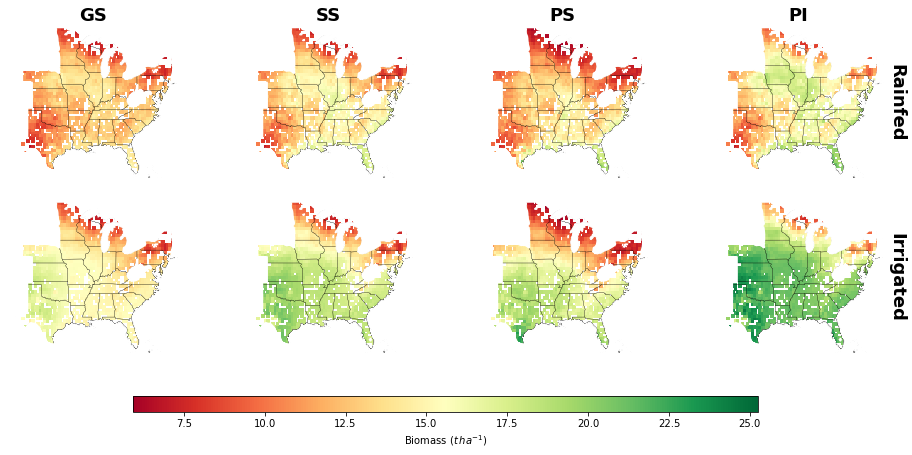

In [79]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).mean()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.biomass2.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='cultivar',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, #=a.biomass2.min(),vmax=a.biomass2.max(),
    figsize=(16,8),
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=1.5)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.25, hspace=0.15)
p.add_colorbar(orientation='horizontal', pad=0.1, shrink=0.7, aspect=40, label='Biomass ($t\,ha^{-1}$)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\mean_biomass0.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

In [86]:
df.describe()

cultivar  irr    lat     lon     rain_a       radn_a      rain_b  \
time                                                                     
22           3    2  29.75 -102.25  78.150429  1677.679391   84.645104   
21           3    2  36.25 -103.25  92.697268  1698.572281  150.993397   

           radn_b      rain_c       radn_c  ...  sw80_harv  sw_stress_expan  \
time                                        ...                               
22    1649.848121  105.074547  1305.297610  ...      0.996            0.950   
21    1772.455039   85.123317  1319.450967  ...      0.996            0.942   

      sw_stress_photo  temp40DAS  temp80DAS   tempHarv  tp0_40  tp40_80  \
time                                                                      
22              0.966  28.184000     31.232  32.233002   0.999    1.000   
21              0.961  22.042999     25.285  24.826000   0.953    0.997   

      tp80_harv   biomass2  
time                        
22        0.999  27.508801  
21        1.000  27.052401  

[2 rows x 82 columns]

# SD Biomass

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-291-95b1efd910fc>:74: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


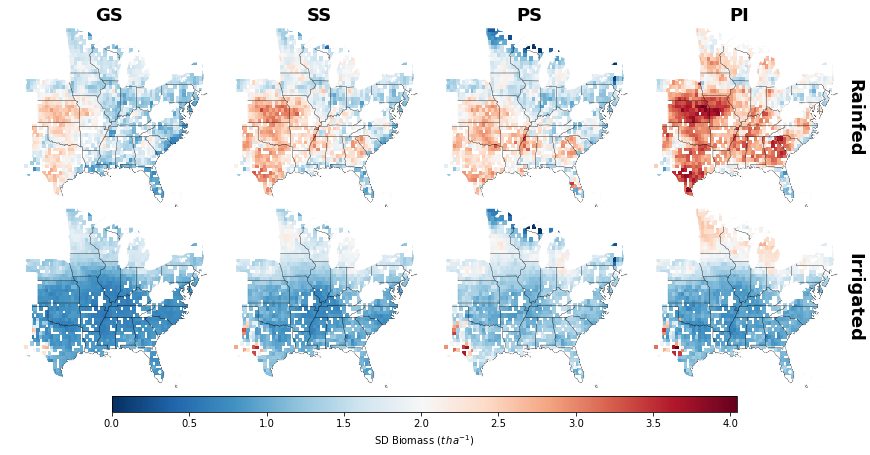

In [291]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).std()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.biomass2.std(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='cultivar',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, #vmin=a.biomass2.quantile(0.001),vmax=a.biomass2.quantile(0.999),
    figsize=(16,8), #rasterized=True,
    cmap=mpl.cm.RdBu_r,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=1.5)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")
    
#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='SD Biomass ($t\,ha^{-1}$)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\sd_biomass.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-295-3555826bf417>:74: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


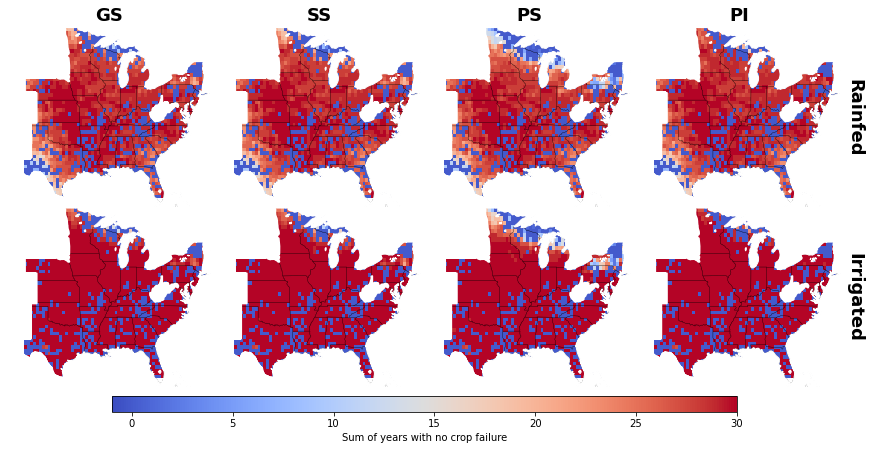

In [295]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).count()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.biomass2.count(dim=('time')).plot(x='lon', y='lat', row='irr', col='cultivar',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1,vmax=30,
    figsize=(16,8),
    cmap=mpl.cm.coolwarm,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='Sum of years with no crop failure')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\failures.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-299-559cc7e18fb7>:74: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


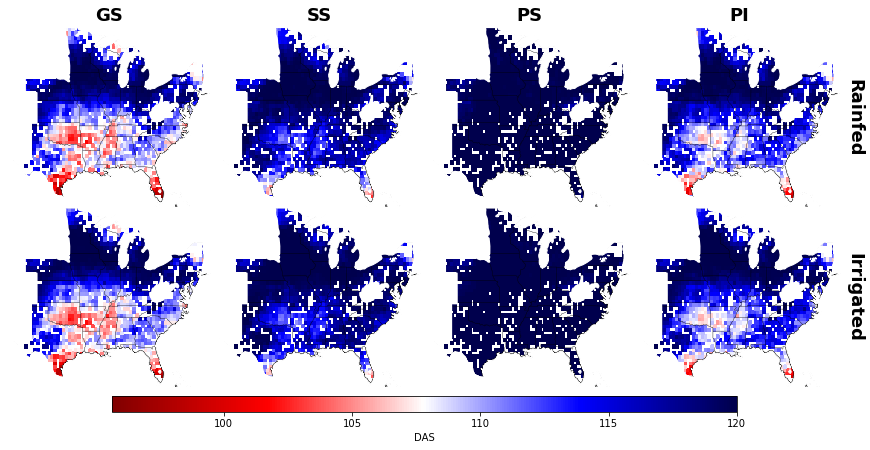

In [299]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).mean()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.DaysAfterSowing.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='cultivar',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=a.DaysAfterSowing.min(),vmax=a.DaysAfterSowing.max(),
    figsize=(16,8),
    cmap=mpl.cm.seismic_r,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='DAS')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\DAS.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-301-6d3af15df981>:74: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


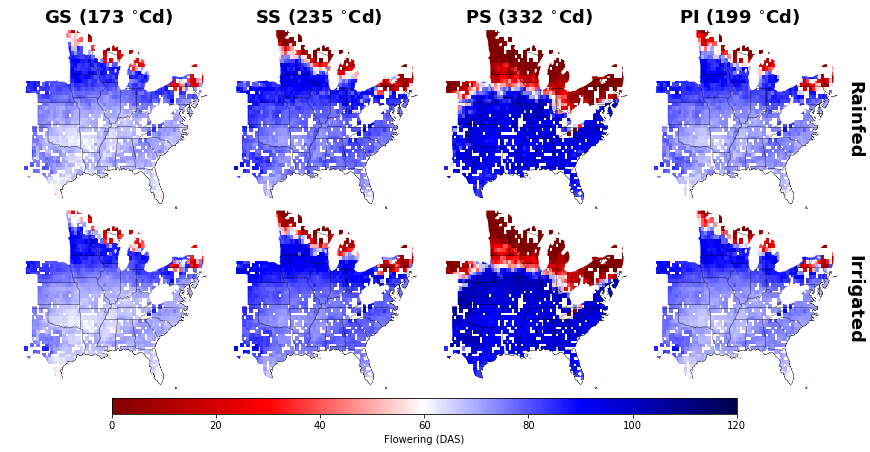

In [301]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).mean()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.FloweringDAS.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='cultivar',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=0,vmax=120,
    figsize=(16,8),
    cmap=mpl.cm.seismic_r,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS (173 $^{\circ}$Cd)", fontsize=18, fontweight="bold")
axes[1].set_title("SS (235 $^{\circ}$Cd)", fontsize=18, fontweight="bold")
axes[2].set_title("PS (332 $^{\circ}$Cd)", fontsize=18, fontweight="bold")    
axes[3].set_title("PI (199 $^{\circ}$Cd)", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='Flowering (DAS)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\Flowering.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-100-97554fc51c9a>:74: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


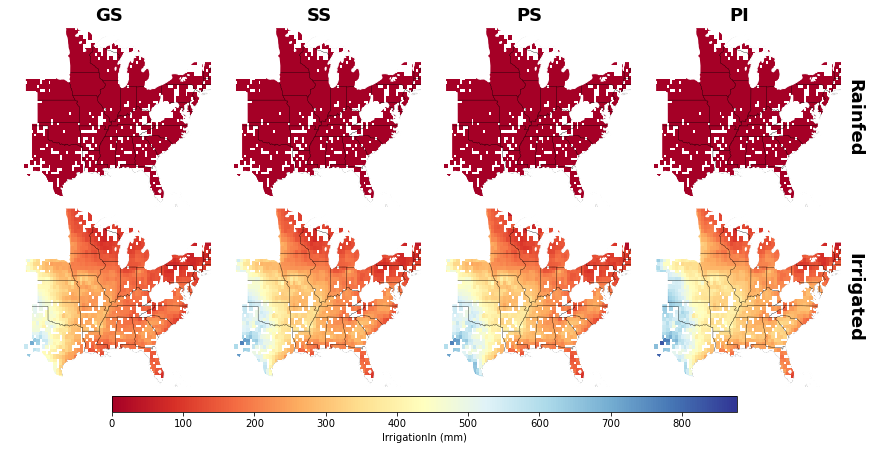

In [100]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).mean()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.IrrigationIn.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='cultivar',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj},
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "IrrigationIn (mm)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='IrrigationIn (mm)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\IrrigationIn.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

## Work with 2D pandas dataframe and correlations

In [302]:
#Conver multidimendional frame to 2D frame
data4pd = data4.to_dataframe()
df = data4pd[data4pd.biomass != 0]
df.reset_index(level=[0,1,2,3,4], inplace=True)

#Change name of column
df.rename(columns={'scen_new':'cultivar'}, inplace=True)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-359-89c43476b5c4>:97: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


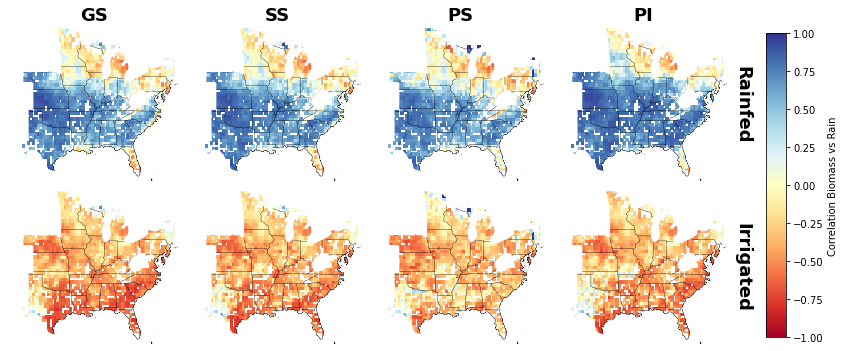

In [359]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='RainIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.RainIn.plot(x='lon', y='lat', col='cultivar', row='irr', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")
    
#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation Biomass vs Rain')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\raincorr.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

In [360]:
e.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\r.csv')

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-357-147e35a4a200>:97: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


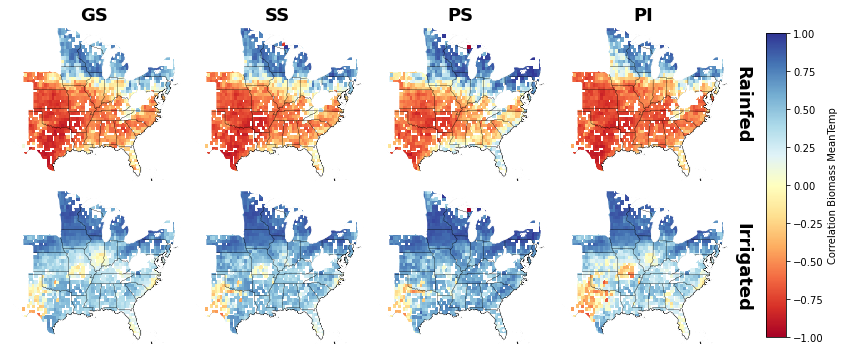

In [357]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='TempIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.TempIn.plot(x='lon', y='lat', col='cultivar', row='irr', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")
    
#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation Biomass MeanTemp')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\tempcorr.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-350-dc9967c69a5e>:97: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


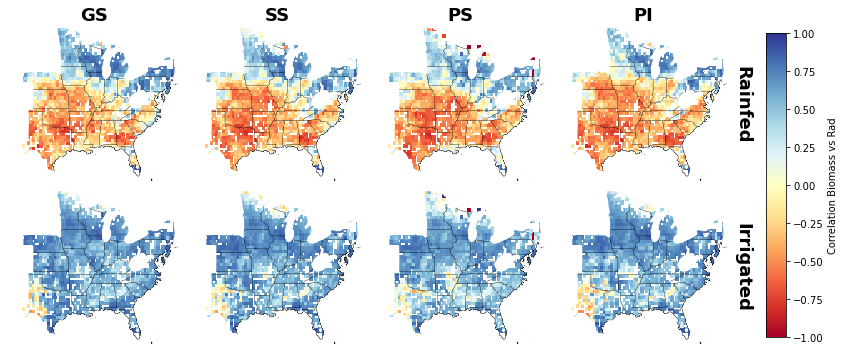

In [350]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='RadiationIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.RadiationIn.plot(x='lon', y='lat', col='cultivar', row='irr', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation Biomass vs Rad')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\radcorr.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-307-5514c90b04ad>:97: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


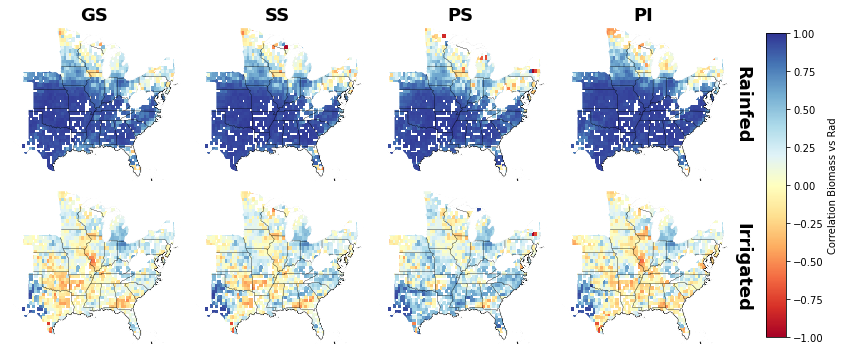

In [307]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='biomass'
x='sw_stress_expan'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.biomass.plot(x='lon', y='lat', col='cultivar', row='irr', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT','VT','NH','MA','RI','CT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "k", linewidth=2)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "k", color='k', linewidth=2)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation Biomass vs Rad')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\biomass vs sw.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-310-db2b9cca0079>:97: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


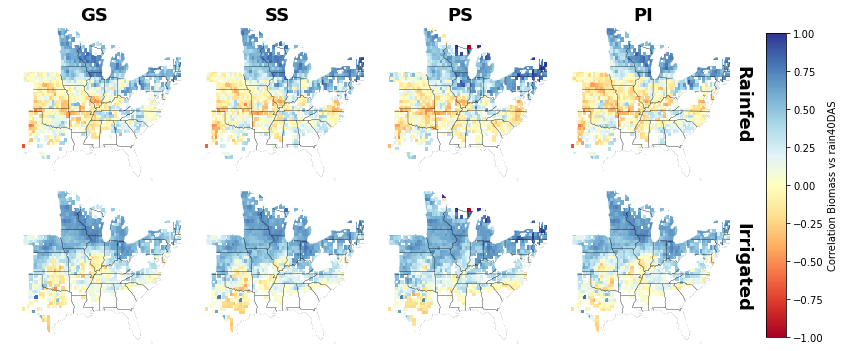

In [310]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='biomass'
x='tp80_harv'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.biomass.plot(x='lon', y='lat', col='cultivar', row='irr', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation Biomass vs rain40DAS')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\biomass vs sw.png', dpi=600, bbox_inches='tight', pad_inches=0)

hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-307-48948d076493>:99: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


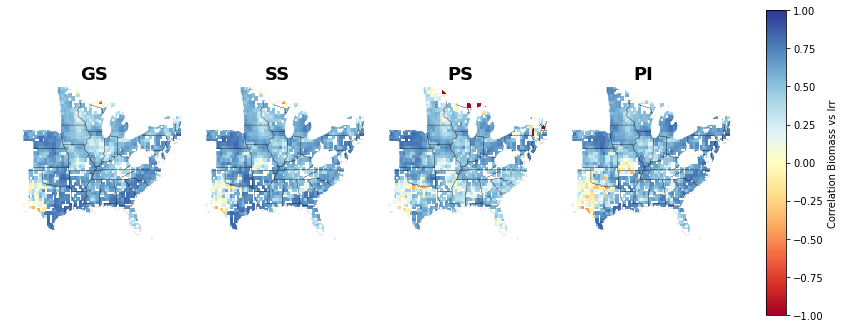

In [307]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='IrrigationIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.IrrigationIn.plot(x='lon', y='lat', col='cultivar', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=0)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation Biomass vs Irr')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\irricorr.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-306-b06ec2cddb6b>:99: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


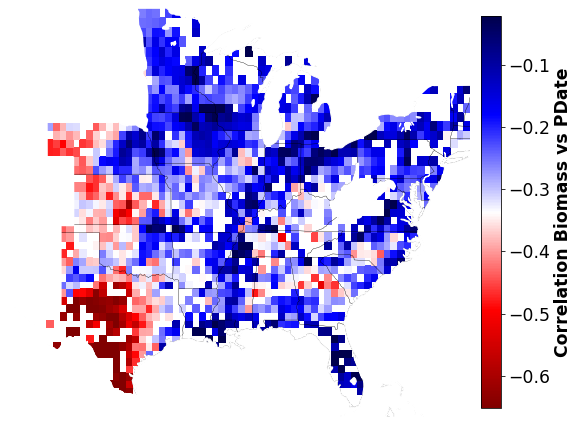

In [306]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='biomass'
x='DOY'

#Set index
dfa = df.set_index(['lat','lon'])

a=dfa.groupby(['lat','lon'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()

#Drop duplicates
e = c.drop_duplicates(['lat','lon'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

a = df.groupby(['lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=corr.biomass.plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.seismic_r, zorder=1, add_colorbar=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=False,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=1)
ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

for value in iso4 :
    area2(ax, value, "white", 4)

area2(ax, value, "white", 4)

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Correlation Biomass vs PDate', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\pdate.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-111-62b63096f234>:99: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


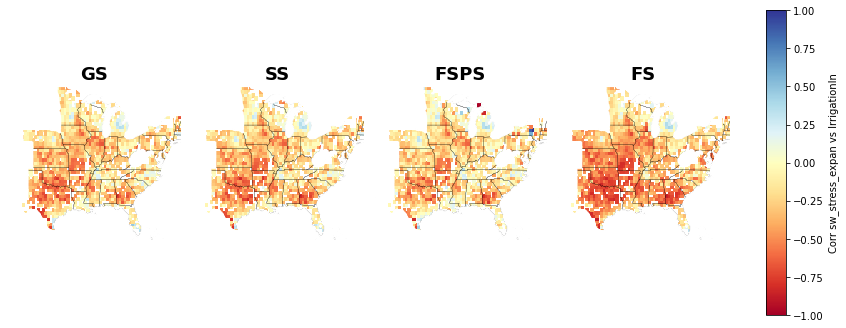

In [111]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='sw_stress_expan'
x='IrrigationIn'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.sw_stress_expan.plot(x='lon', y='lat', col='cultivar', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr,
                              alpha = 1.00, linewidth =3, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

def area2(ax, iso, clr, z) :
    
    shp = shpreader.natural_earth(resolution='110m',category='cultural', name='admin_1_states_provinces_lakes_shp')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['postal'] == iso: 
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, zorder=z,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
            except Exception as e:
                #print(e)
                import shapely.wkt as wkt
                from shapely.geometry import MultiPolygon
                list_str_polygons = [str(n.geometry)]
                c = MultiPolygon(map(wkt.loads, list_str_polygons))
                ax.add_geometries(c, ccrs.PlateCarree(), facecolor=clr,
                                  alpha = 1.00, linewidth =2, edgecolor = "white",
                                  label=n.attributes['postal']) 
    return ax

iso4 = ['NM','CO','WY','ND','SD', 'WV', 'MT']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("PS", fontsize=18, fontweight="bold")    
axes[3].set_title("PI", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                    draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor = "k", linewidth=0.2, zorder=1)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([-100, -90, -80])
    gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}

    for value in iso4 :
        area2(ax, value, "white", 4)

    area2(ax, value, "white", 4)

    for value in iso3 :
        area(ax, value, "white")

    area(ax, value, "white")
    
#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=0)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Corr sw_stress_expan vs IrrigationIn')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\sw vs Irri.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

## Heatmap and correlations

In [12]:
#Read dataframe with env names
X= pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\dfenv2.csv')
X0=X.drop(['rain_a', 'radn_a', 'rain_b', 'radn_b', 'rain_c',
       'radn_c', 'wind_a', 'hur_a', 'hurtmax_a', 'cropland_a', 'tmax_a',
       'tmin_a', 'tmean_a', 'wind_b', 'hur_b', 'hurtmax_b', 'cropland_b',
       'tmax_b', 'tmin_b', 'tmean_b', 'wind_c', 'hur_c', 'hurtmax_c',
       'cropland_c', 'tmax_c', 'tmin_c', 'tmean_c', 'radn', 'rain', 'tmin',
       'tmax', 'tmean', 'wind', 'hur', 'hurtmax', 'cropland', 'irr',
       'cultivar', 'time', 'DOY', 'DaysAfterSowing', 'ESW1av', 'FloweringDAS',
       'IrrigationIn', 'LeafNo', 'MaxLAI', 'N_stress_expan', 'N_stress_photo',
       'PAWC', 'RadiationIn', 'RainIn', 'TempIn', 'WU', 'aMaxT', 'aMinT',
       'actual_ET', 'biomass', 'planting_date', 'potential_ET', 'rad40DAS',
       'rad80DAS', 'radHarv', 'rain40DAS', 'rain80DAS', 'rainHarv', 'ri0_40',
       'ri40_80', 'ri80_harv', 'scen', 'sw0_40', 'sw40_80', 'sw80_harv',
       'sw_stress_expan', 'sw_stress_photo', 'temp40DAS', 'temp80DAS',
       'tempHarv', 'tp0_40', 'tp40_80', 'tp80_harv',], axis=1)

#Merge current dataset to include envs
dfa = pd.merge(X0, df, how ='inner', on =['lat','lon']) 
dfa.rename(columns={'env_name_x':'env_name','cropland_x':'cropland'}, inplace=True)
dfa0 = dfa.dropna()
dfa3 = dfa0.reset_index()

In [13]:
dfa3.biomass2.min()
dfa3[dfa3['biomass2'] == 5.789100170135498]

index    lat    lon  env env_name  cultivar  irr      rain_a  \
270998  270998  43.75 -89.25    1      Low         2    2  206.195423   

             radn_a     rain_b  ...  sw80_harv  sw_stress_expan  \
270998  1291.711554  248.47069  ...        1.0            0.916   

        sw_stress_photo  temp40DAS  temp80DAS  tempHarv  tp0_40  tp40_80  \
270998            0.916  17.618999     21.052    15.217   0.761    0.953   

        tp80_harv  biomass2  
270998      0.592    5.7891  

[1 rows x 85 columns]

# Calculate statistics

In [44]:
dfa4 = dfa3.loc[dfa3['FloweringDAS'] != 0]

stat_mean = dfa4.groupby(['cultivar','irr','env_name'],as_index=False).mean()
stat_sd = dfa4.groupby(['cultivar','irr','env_name'],as_index=False).std()
stat_c = dfa4.groupby(['cultivar','irr','env_name'],as_index=False).count()
#stat_mean.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\validationStatMean.csv')
#stat_sd.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\validationStatSD.csv')
#stat_c.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\validationStatc.csv')

stat_mean.loc[stat_mean.cultivar == 0, 'cv'] = "GS"
stat_mean.loc[stat_mean.cultivar == 1, 'cv'] = "SS"
stat_mean.loc[stat_mean.cultivar == 2, 'cv'] = "PS"
stat_mean.loc[stat_mean.cultivar == 3, 'cv'] = "PI"

In [11]:
stat_mean.columns

Index(['cultivar', 'irr', 'env_name', 'index', 'lat', 'lon', 'env', 'rain_a',
       'radn_a', 'rain_b', 'radn_b', 'rain_c', 'radn_c', 'wind_a', 'hur_a',
       'hurtmax_a', 'cropland_a', 'tmax_a', 'tmin_a', 'tmean_a', 'wind_b',
       'hur_b', 'hurtmax_b', 'cropland_b', 'tmax_b', 'tmin_b', 'tmean_b',
       'wind_c', 'hur_c', 'hurtmax_c', 'cropland_c', 'tmax_c', 'tmin_c',
       'tmean_c', 'radn', 'rain', 'tmin', 'tmax', 'tmean', 'wind', 'hur',
       'hurtmax', 'cropland', 'DOY', 'DaysAfterSowing', 'ESW1av',
       'FloweringDAS', 'IrrigationIn', 'LeafNo', 'MaxLAI', 'N_stress_expan',
       'N_stress_photo', 'PAWC', 'RadiationIn', 'RainIn', 'TempIn', 'WU',
       'aMaxT', 'aMinT', 'actual_ET', 'biomass', 'planting_date',
       'potential_ET', 'rad40DAS', 'rad80DAS', 'radHarv', 'rain40DAS',
       'rain80DAS', 'rainHarv', 'ri0_40', 'ri40_80', 'ri80_harv', 'scen',
       'sw0_40', 'sw40_80', 'sw80_harv', 'sw_stress_expan', 'sw_stress_photo',
       'temp40DAS', 'temp80DAS', 'tempHarv'

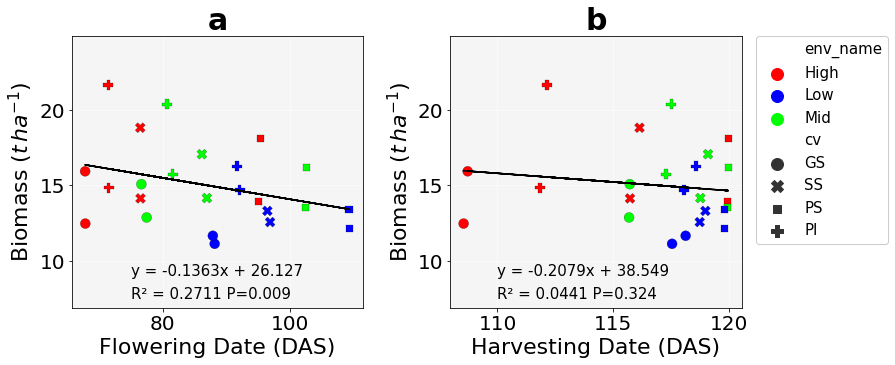

In [78]:
color_dict = dict({'High': '#ff0101','Mid':'#00ff01','Low':'#0000fe'})
kwargs  =   {'edgecolor':"k"}
fig = plt.figure(figsize=(12,5))

ax=plt.subplot(1, 2, 1)
sns.scatterplot(x="FloweringDAS", y="biomass2", hue='env_name',style='cv', alpha=1, data=stat_mean, linewidth=0.2,**kwargs,s=100, palette=color_dict)

# Formatting graph and background
plt.legend(prop=dict(size=15),bbox_to_anchor=(2.35, 1), loc=2, borderaxespad=0., ncol=1,framealpha=1,markerscale=2)
plt.ylabel('Biomass ($t\,ha^{-1}$)', fontsize=22)
plt.xlabel('Flowering Date (DAS)', fontsize =22)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.set_xlim([10.1,32.9])
ax.set_ylim([6.9,24.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
#ax.get_legend().remove()
#ax.set_title('b',fontsize= 30,weight='bold') 

y=stat_mean.biomass2.values
x=stat_mean.FloweringDAS.values

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color='k')

plt.title('a',fontsize=30, fontweight='bold')
plt.text(75, 9,'y = -0.1363x + 26.127', fontsize=15,color='k')
plt.text(75, 7.5,'R² = 0.2711 P=0.009', fontsize=15,color='k')

##################################################################
ax=plt.subplot(1, 2, 2)
sns.scatterplot(x="DaysAfterSowing", y="biomass2", hue='env_name', style='cv', alpha=1, data=stat_mean, linewidth=0.2,**kwargs,s=100, palette=color_dict)

# Formatting graph and background
plt.legend(prop=dict(size=12),bbox_to_anchor=(0.1, 0.9), loc=2, borderaxespad=0., ncol=1,framealpha=1,markerscale=2)
plt.ylabel('Biomass ($t\,ha^{-1}$)', fontsize =22)
plt.xlabel('Harvesting Date (DAS)', fontsize =22)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.set_xlim([10.1,32.9])
ax.set_ylim([6.9,24.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.get_legend().remove()
#ax.set_title('b',fontsize= 30,weight='bold') 

y=stat_mean.biomass2.values
x=stat_mean.DaysAfterSowing.values

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color='k')

plt.title('b',fontsize=30, fontweight='bold')
plt.text(110, 9,'y = -0.2079x + 38.549', fontsize=15,color='k')
plt.text(110, 7.5,'R² = 0.0441 P=0.324', fontsize=15,color='k')
####################################################################
plt.subplots_adjust(wspace=0.3, hspace=0)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\fre2.png', dpi=600, bbox_inches='tight', pad_inches=0)

In [325]:
stat_mean[stat_mean['biomass2'] == 21.644567]

cultivar  irr env_name          index        lat        lon  env  time  \
21         3    2     High  101000.373016  34.941358 -92.291446  0.0  15.5   

        rain_a       radn_a  ...  sw80_harv  sw_stress_expan  sw_stress_photo  \
21  232.910814  1438.202828  ...   0.979666         0.930155         0.941985   

    temp40DAS  temp80DAS   tempHarv    tp0_40   tp40_80  tp80_harv   biomass2  
21  23.589808  26.840187  26.200039  0.975791  0.999211   0.988641  21.644567  

[1 rows x 86 columns]

# Work with heatmaps

In [89]:
a = dfa3.loc[dfa3['irr'] ==2]
a.biomass2.describe()

count    156399.000000
mean         16.693054
std           3.775216
min           5.789100
25%          14.509050
50%          16.949499
75%          19.387100
max          27.508801
Name: biomass2, dtype: float64

In [93]:
dfa3.loc[dfa3['biomass2'] < 5.79]

index    lat    lon  env env_name  cultivar  irr      rain_a  \
247266  247266  42.25 -75.25    1      Low         0    1  222.515609   
270998  270998  43.75 -89.25    1      Low         2    2  206.195423   
272576  272576  43.75 -84.75    1      Low         2    1  173.750965   
296178  296178  46.75 -88.75    1      Low         0    1  155.665701   

             radn_a      rain_b  ...  sw80_harv  sw_stress_expan  \
247266  1227.625141  252.850492  ...        1.0            0.817   
270998  1291.711554  248.470690  ...        1.0            0.916   
272576  1303.760911  179.435159  ...        1.0            0.983   
296178  1340.398606  192.758750  ...        1.0            0.980   

        sw_stress_photo  temp40DAS  temp80DAS  tempHarv  tp0_40  tp40_80  \
247266            0.817  20.132999  19.493999    15.414   0.908    0.897   
270998            0.916  17.618999  21.052000    15.217   0.761    0.953   
272576            0.983  20.362000  18.108999    14.935   0.943    0.812   
296178            0.980  18.466999  18.327999    12.448   0.824    0.838   

        tp80_harv  biomass2  
247266      0.598    5.7896  
270998      0.592    5.7891  
272576      0.551    5.7899  
296178      0.377    5.7896  

[4 rows x 85 columns]

In [327]:
#Export data for Variance Decomposition Analysis
dfa = dfa3.dropna()
var1 = dfa.groupby(['env_name','irr', 'lat', 'lon', 'cultivar'],as_index=False).mean()

var=var1.drop(['DaysAfterSowing', 'planting_date', 'scen','aMaxT','aMinT','IrrigationIn','FloweringDAS','biomass2'], axis=1)

#var.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\var.csv')

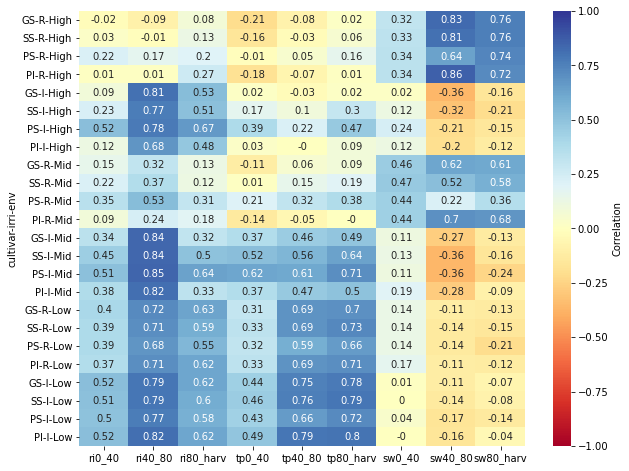

In [338]:
#Create filters and rearrange dataframes
A = dfa3.loc[dfa3['env_name'] == 'High']
B = dfa3.loc[dfa3['env_name'] == 'Mid']
C = dfa3.loc[dfa3['env_name'] == 'Low']

Adry = A.loc[A['irr'] == 1]
Airri = A.loc[A['irr'] == 2]
Bdry = B.loc[B['irr'] == 1]
Birri = B.loc[B['irr'] == 2]
Cdry = C.loc[C['irr'] == 1]
Cirri = C.loc[C['irr'] == 2]

AGSd = Adry.loc[Adry['cultivar'] == 0]
ASSd = Adry.loc[Adry['cultivar'] == 1]
AFSPSd = Adry.loc[Adry['cultivar'] == 2]
AFSd = Adry.loc[Adry['cultivar'] == 3]
AGSi = Airri.loc[Airri['cultivar'] == 0]
ASSi = Airri.loc[Airri['cultivar'] == 1]
AFSPSi = Airri.loc[Airri['cultivar'] == 2]
AFSi = Airri.loc[Airri['cultivar'] == 3]

BGSd = Bdry.loc[Bdry['cultivar'] == 0]
BSSd = Bdry.loc[Bdry['cultivar'] == 1]
BFSPSd = Bdry.loc[Bdry['cultivar'] == 2]
BFSd = Bdry.loc[Bdry['cultivar'] == 3]
BGSi = Birri.loc[Birri['cultivar'] == 0]
BSSi = Birri.loc[Birri['cultivar'] == 1]
BFSPSi = Birri.loc[Birri['cultivar'] == 2]
BFSi = Birri.loc[Birri['cultivar'] == 3]

CGSd = Cdry.loc[Cdry['cultivar'] == 0]
CSSd = Cdry.loc[Cdry['cultivar'] == 1]
CFSPSd = Cdry.loc[Cdry['cultivar'] == 2]
CFSd = Cdry.loc[Cdry['cultivar'] == 3]
CGSi = Cirri.loc[Cirri['cultivar'] == 0]
CSSi = Cirri.loc[Cirri['cultivar'] == 1]
CFSPSi = Cirri.loc[Cirri['cultivar'] == 2]
CFSi = Cirri.loc[Cirri['cultivar'] == 3]

AGSdcorr = AGSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
AGSdcorr['cultivar'] = 'GS'
AGSdcorr['irri'] = 'R'
AGSdcorr['env'] = 'High'
AFSdcorr = AFSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
AFSdcorr['cultivar'] = 'PI'
AFSdcorr['irri'] = 'R'
AFSdcorr['env'] = 'High'
ASSdcorr = ASSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
ASSdcorr['cultivar'] = 'SS'
ASSdcorr['irri'] = 'R'
ASSdcorr['env'] = 'High'
AFSPSdcorr = AFSPSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
AFSPSdcorr['cultivar'] = 'PS'
AFSPSdcorr['irri'] = 'R'
AFSPSdcorr['env'] = 'High'

AGSicorr = AGSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
AGSicorr['cultivar'] = 'GS'
AGSicorr['irri'] = 'I'
AGSicorr['env'] = 'High'
AFSicorr = AFSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
AFSicorr['cultivar'] = 'PI'
AFSicorr['irri'] = 'I'
AFSicorr['env'] = 'High'
ASSicorr = ASSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
ASSicorr['cultivar'] = 'SS'
ASSicorr['irri'] = 'I'
ASSicorr['env'] = 'High'
AFSPSicorr = AFSPSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
AFSPSicorr['cultivar'] = 'PS'
AFSPSicorr['irri'] = 'I'
AFSPSicorr['env'] = 'High'

BGSdcorr = BGSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
BGSdcorr['cultivar'] = 'GS'
BGSdcorr['irri'] = 'R'
BGSdcorr['env'] = 'Mid'
BFSdcorr = BFSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
BFSdcorr['cultivar'] = 'PI'
BFSdcorr['irri'] = 'R'
BFSdcorr['env'] = 'Mid'
BSSdcorr = BSSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
BSSdcorr['cultivar'] = 'SS'
BSSdcorr['irri'] = 'R'
BSSdcorr['env'] = 'Mid'
BFSPSdcorr = BFSPSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
BFSPSdcorr['cultivar'] = 'PS'
BFSPSdcorr['irri'] = 'R'
BFSPSdcorr['env'] = 'Mid'

BGSicorr = BGSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
BGSicorr['cultivar'] = 'GS'
BGSicorr['irri'] = 'I'
BGSicorr['env'] = 'Mid'
BFSicorr = BFSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
BFSicorr['cultivar'] = 'PI'
BFSicorr['irri'] = 'I'
BFSicorr['env'] = 'Mid'
BSSicorr = BSSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
BSSicorr['cultivar'] = 'SS'
BSSicorr['irri'] = 'I'
BSSicorr['env'] = 'Mid'
BFSPSicorr = BFSPSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
BFSPSicorr['cultivar'] = 'PS'
BFSPSicorr['irri'] = 'I'
BFSPSicorr['env'] = 'Mid'

CGSdcorr = CGSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
CGSdcorr['cultivar'] = 'GS'
CGSdcorr['irri'] = 'R'
CGSdcorr['env'] = 'Low'
CFSdcorr = CFSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
CFSdcorr['cultivar'] = 'PI'
CFSdcorr['irri'] = 'R'
CFSdcorr['env'] = 'Low'
CSSdcorr = CSSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
CSSdcorr['cultivar'] = 'SS'
CSSdcorr['irri'] = 'R'
CSSdcorr['env'] = 'Low'
CFSPSdcorr = CFSPSd.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
CFSPSdcorr['cultivar'] = 'PS'
CFSPSdcorr['irri'] = 'R'
CFSPSdcorr['env'] = 'Low'

CGSicorr = CGSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
CGSicorr['cultivar'] = 'GS'
CGSicorr['irri'] = 'I'
CGSicorr['env'] = 'Low'
CFSicorr = CFSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
CFSicorr['cultivar'] = 'PI'
CFSicorr['irri'] = 'I'
CFSicorr['env'] = 'Low'
CSSicorr = CSSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
CSSicorr['cultivar'] = 'SS'
CSSicorr['irri'] = 'I'
CSSicorr['env'] = 'Low'
CFSPSicorr = CFSPSi.corr().loc[['biomass'],['ri0_40', 'ri40_80', 'ri80_harv','tp0_40', 'tp40_80', 'tp80_harv','sw0_40', 'sw40_80', 'sw80_harv']]
CFSPSicorr['cultivar'] = 'PS'
CFSPSicorr['irri'] = 'I'
CFSPSicorr['env'] = 'Low'

frames = [AGSdcorr,ASSdcorr,AFSPSdcorr,AFSdcorr,AGSicorr,ASSicorr,AFSPSicorr,AFSicorr,
          BGSdcorr,BSSdcorr,BFSPSdcorr,BFSdcorr,BGSicorr,BSSicorr,BFSPSicorr,BFSicorr,
          CGSdcorr,CSSdcorr,CFSPSdcorr,CFSdcorr,CGSicorr,CSSicorr,CFSPSicorr,CFSicorr]

corr = pd.concat(frames)
corr.reset_index(level=[0], inplace=True)

df_final=corr.drop(['index'], axis=1)
df1 = df_final.set_index(['cultivar','irri','env'])
df2 = df1.round(decimals=2)

#Plot heatmap
fig= plt.figure(figsize=(10,8))
sns.heatmap(df2, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\figs\corr.png', dpi=300, bbox_inches='tight', pad_inches=0)

hide_toggle()

In [339]:
df_corr = df2.reset_index()

In [340]:
df_corr2 = df_corr.set_index(['cultivar','irri'])

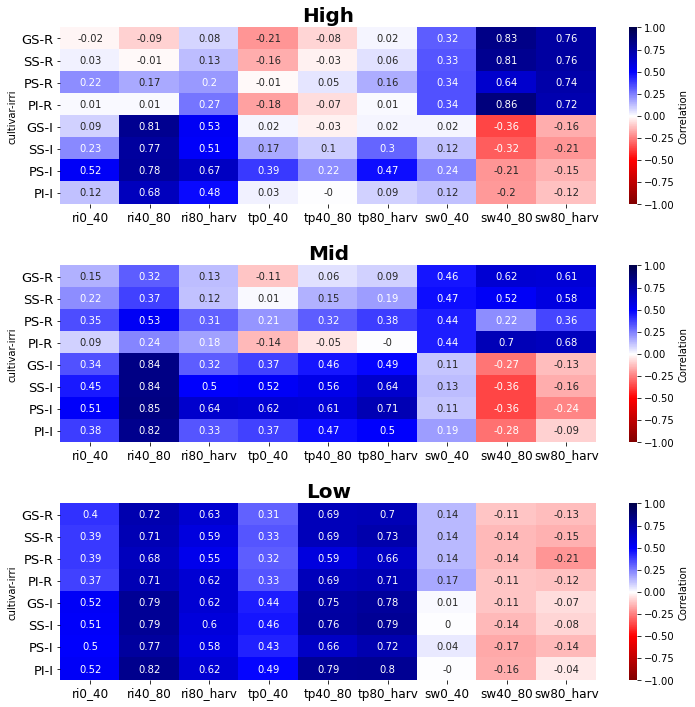

In [341]:
A = df_corr2.loc[df_corr2['env'] == 'High']
A2 = A.drop(['env'], axis=1)
B = df_corr2.loc[df_corr2['env'] == 'Mid']
B2 = B.drop(['env'], axis=1)
C = df_corr2.loc[df_corr2['env'] == 'Low']
C2 = C.drop(['env'], axis=1)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
sns.heatmap(A2, ax=ax1, annot=True, cmap='seismic_r',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})
sns.heatmap(B2, ax=ax2, annot=True, cmap='seismic_r',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})
sns.heatmap(C2, ax=ax3, annot=True, cmap='seismic_r',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})

ax1.set_title('High', fontweight='bold', size=20)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=13)

ax2.set_title('Mid', fontweight='bold', size=20)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=13)

ax3.set_title('Low', fontweight='bold', size=20)
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=13)

plt.subplots_adjust(wspace=0, hspace=0.35)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\corr2.png', dpi=300, bbox_inches='tight', pad_inches=0)
hide_toggle()

In [342]:
A2

ri0_40  ri40_80  ri80_harv  tp0_40  tp40_80  tp80_harv  sw0_40  \
cultivar irri                                                                   
GS       R      -0.02    -0.09       0.08   -0.21    -0.08       0.02    0.32   
SS       R       0.03    -0.01       0.13   -0.16    -0.03       0.06    0.33   
PS       R       0.22     0.17       0.20   -0.01     0.05       0.16    0.34   
PI       R       0.01     0.01       0.27   -0.18    -0.07       0.01    0.34   
GS       I       0.09     0.81       0.53    0.02    -0.03       0.02    0.02   
SS       I       0.23     0.77       0.51    0.17     0.10       0.30    0.12   
PS       I       0.52     0.78       0.67    0.39     0.22       0.47    0.24   
PI       I       0.12     0.68       0.48    0.03    -0.00       0.09    0.12   

               sw40_80  sw80_harv  
cultivar irri                      
GS       R        0.83       0.76  
SS       R        0.81       0.76  
PS       R        0.64       0.74  
PI       R        0.86       0.72  
GS       I       -0.36      -0.16  
SS       I       -0.32      -0.21  
PS       I       -0.21      -0.15  
PI       I       -0.20      -0.12

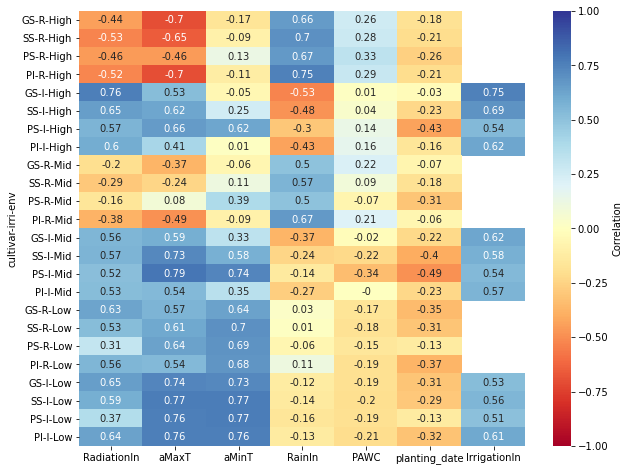

In [343]:
#Create filters and rearrange dataframes
A = dfa3.loc[dfa3['env_name'] == 'High']
B = dfa3.loc[dfa3['env_name'] == 'Mid']
C = dfa3.loc[dfa3['env_name'] == 'Low']

Adry = A.loc[A['irr'] == 1]
Airri = A.loc[A['irr'] == 2]
Bdry = B.loc[B['irr'] == 1]
Birri = B.loc[B['irr'] == 2]
Cdry = C.loc[C['irr'] == 1]
Cirri = C.loc[C['irr'] == 2]

AGSd = Adry.loc[Adry['cultivar'] == 0]
ASSd = Adry.loc[Adry['cultivar'] == 1]
AFSPSd = Adry.loc[Adry['cultivar'] == 2]
AFSd = Adry.loc[Adry['cultivar'] == 3]
AGSi = Airri.loc[Airri['cultivar'] == 0]
ASSi = Airri.loc[Airri['cultivar'] == 1]
AFSPSi = Airri.loc[Airri['cultivar'] == 2]
AFSi = Airri.loc[Airri['cultivar'] == 3]

BGSd = Bdry.loc[Bdry['cultivar'] == 0]
BSSd = Bdry.loc[Bdry['cultivar'] == 1]
BFSPSd = Bdry.loc[Bdry['cultivar'] == 2]
BFSd = Bdry.loc[Bdry['cultivar'] == 3]
BGSi = Birri.loc[Birri['cultivar'] == 0]
BSSi = Birri.loc[Birri['cultivar'] == 1]
BFSPSi = Birri.loc[Birri['cultivar'] == 2]
BFSi = Birri.loc[Birri['cultivar'] == 3]

CGSd = Cdry.loc[Cdry['cultivar'] == 0]
CSSd = Cdry.loc[Cdry['cultivar'] == 1]
CFSPSd = Cdry.loc[Cdry['cultivar'] == 2]
CFSd = Cdry.loc[Cdry['cultivar'] == 3]
CGSi = Cirri.loc[Cirri['cultivar'] == 0]
CSSi = Cirri.loc[Cirri['cultivar'] == 1]
CFSPSi = Cirri.loc[Cirri['cultivar'] == 2]
CFSi = Cirri.loc[Cirri['cultivar'] == 3]

AGSdcorr = AGSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
AGSdcorr['cultivar'] = 'GS'
AGSdcorr['irri'] = 'R'
AGSdcorr['env'] = 'High'
AFSdcorr = AFSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
AFSdcorr['cultivar'] = 'PI'
AFSdcorr['irri'] = 'R'
AFSdcorr['env'] = 'High'
ASSdcorr = ASSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
ASSdcorr['cultivar'] = 'SS'
ASSdcorr['irri'] = 'R'
ASSdcorr['env'] = 'High'
AFSPSdcorr = AFSPSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
AFSPSdcorr['cultivar'] = 'PS'
AFSPSdcorr['irri'] = 'R'
AFSPSdcorr['env'] = 'High'

AGSicorr = AGSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
AGSicorr['cultivar'] = 'GS'
AGSicorr['irri'] = 'I'
AGSicorr['env'] = 'High'
AFSicorr = AFSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
AFSicorr['cultivar'] = 'PI'
AFSicorr['irri'] = 'I'
AFSicorr['env'] = 'High'
ASSicorr = ASSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
ASSicorr['cultivar'] = 'SS'
ASSicorr['irri'] = 'I'
ASSicorr['env'] = 'High'
AFSPSicorr = AFSPSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
AFSPSicorr['cultivar'] = 'PS'
AFSPSicorr['irri'] = 'I'
AFSPSicorr['env'] = 'High'

BGSdcorr = BGSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
BGSdcorr['cultivar'] = 'GS'
BGSdcorr['irri'] = 'R'
BGSdcorr['env'] = 'Mid'
BFSdcorr = BFSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
BFSdcorr['cultivar'] = 'PI'
BFSdcorr['irri'] = 'R'
BFSdcorr['env'] = 'Mid'
BSSdcorr = BSSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
BSSdcorr['cultivar'] = 'SS'
BSSdcorr['irri'] = 'R'
BSSdcorr['env'] = 'Mid'
BFSPSdcorr = BFSPSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
BFSPSdcorr['cultivar'] = 'PS'
BFSPSdcorr['irri'] = 'R'
BFSPSdcorr['env'] = 'Mid'

BGSicorr = BGSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
BGSicorr['cultivar'] = 'GS'
BGSicorr['irri'] = 'I'
BGSicorr['env'] = 'Mid'
BFSicorr = BFSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
BFSicorr['cultivar'] = 'PI'
BFSicorr['irri'] = 'I'
BFSicorr['env'] = 'Mid'
BSSicorr = BSSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
BSSicorr['cultivar'] = 'SS'
BSSicorr['irri'] = 'I'
BSSicorr['env'] = 'Mid'
BFSPSicorr = BFSPSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
BFSPSicorr['cultivar'] = 'PS'
BFSPSicorr['irri'] = 'I'
BFSPSicorr['env'] = 'Mid'

CGSdcorr = CGSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
CGSdcorr['cultivar'] = 'GS'
CGSdcorr['irri'] = 'R'
CGSdcorr['env'] = 'Low'
CFSdcorr = CFSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
CFSdcorr['cultivar'] = 'PI'
CFSdcorr['irri'] = 'R'
CFSdcorr['env'] = 'Low'
CSSdcorr = CSSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
CSSdcorr['cultivar'] = 'SS'
CSSdcorr['irri'] = 'R'
CSSdcorr['env'] = 'Low'
CFSPSdcorr = CFSPSd.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
CFSPSdcorr['cultivar'] = 'PS'
CFSPSdcorr['irri'] = 'R'
CFSPSdcorr['env'] = 'Low'

CGSicorr = CGSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
CGSicorr['cultivar'] = 'GS'
CGSicorr['irri'] = 'I'
CGSicorr['env'] = 'Low'
CFSicorr = CFSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
CFSicorr['cultivar'] = 'PI'
CFSicorr['irri'] = 'I'
CFSicorr['env'] = 'Low'
CSSicorr = CSSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
CSSicorr['cultivar'] = 'SS'
CSSicorr['irri'] = 'I'
CSSicorr['env'] = 'Low'
CFSPSicorr = CFSPSi.corr().loc[['biomass'],['RadiationIn','aMaxT','aMinT','RainIn','PAWC','planting_date','IrrigationIn']]
CFSPSicorr['cultivar'] = 'PS'
CFSPSicorr['irri'] = 'I'
CFSPSicorr['env'] = 'Low'

frames = [AGSdcorr,ASSdcorr,AFSPSdcorr,AFSdcorr,AGSicorr,ASSicorr,AFSPSicorr,AFSicorr,
          BGSdcorr,BSSdcorr,BFSPSdcorr,BFSdcorr,BGSicorr,BSSicorr,BFSPSicorr,BFSicorr,
          CGSdcorr,CSSdcorr,CFSPSdcorr,CFSdcorr,CGSicorr,CSSicorr,CFSPSicorr,CFSicorr]

corr = pd.concat(frames)
corr.reset_index(level=[0], inplace=True)

df_final=corr.drop(['index'], axis=1)
df1 = df_final.set_index(['cultivar','irri','env'])
df2 = df1.round(decimals=2)

#Plot heatmap
fig= plt.figure(figsize=(10,8))
sns.heatmap(df2, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\figs\corr.png', dpi=300, bbox_inches='tight', pad_inches=0)

hide_toggle()

In [344]:
df_corr = df2.reset_index()

In [345]:
df_corr2 = df_corr.set_index(['cultivar','irri'])

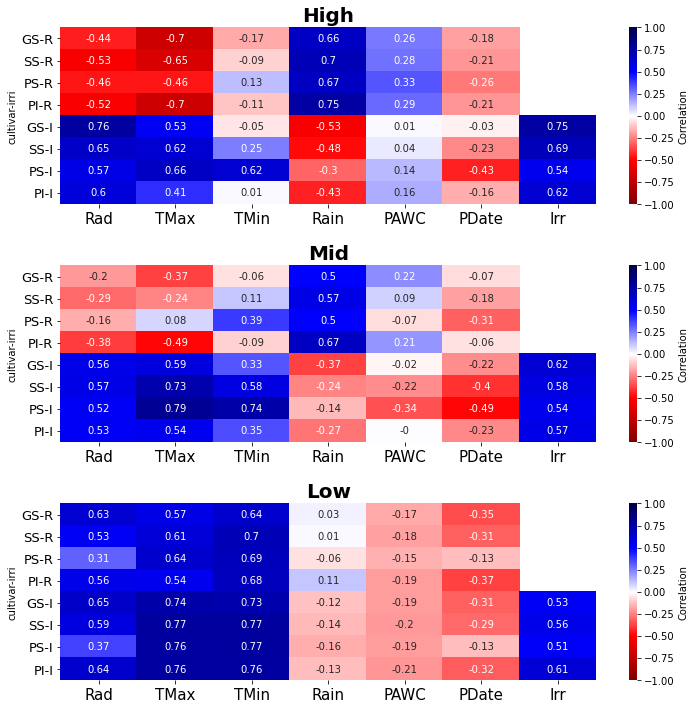

In [346]:
df_corr2.rename(columns={'RadiationIn':'Rad','aMaxT':'TMax','aMinT':'TMin',
                        'RainIn':'Rain','actual_ET':'ET','IrrigationIn':'Irr','radInt':'RadInt','planting_date':'PDate'}, inplace=True)

A = df_corr2.loc[df_corr2['env'] == 'High']
A2 = A.drop(['env'], axis=1)
B = df_corr2.loc[df_corr2['env'] == 'Mid']
B2 = B.drop(['env'], axis=1)
C = df_corr2.loc[df_corr2['env'] == 'Low']
C2 = C.drop(['env'], axis=1)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
sns.heatmap(A2, ax=ax1, annot=True, cmap='seismic_r',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})
sns.heatmap(B2, ax=ax2, annot=True, cmap='seismic_r',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})
sns.heatmap(C2, ax=ax3, annot=True, cmap='seismic_r',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})

ax1.set_title('High', fontweight='bold', size=20)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=13)

ax2.set_title('Mid', fontweight='bold', size=20)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=13)

ax3.set_title('Low', fontweight='bold', size=20)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=13)

plt.subplots_adjust(wspace=0, hspace=0.35)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\corr.png', dpi=300, bbox_inches='tight', pad_inches=0)
hide_toggle()

In [349]:
C2

Rad  TMax  TMin  Rain  PAWC  PDate   Irr
cultivar irri                                           
GS       R     0.63  0.57  0.64  0.03 -0.17  -0.35   NaN
SS       R     0.53  0.61  0.70  0.01 -0.18  -0.31   NaN
PS       R     0.31  0.64  0.69 -0.06 -0.15  -0.13   NaN
PI       R     0.56  0.54  0.68  0.11 -0.19  -0.37   NaN
GS       I     0.65  0.74  0.73 -0.12 -0.19  -0.31  0.53
SS       I     0.59  0.77  0.77 -0.14 -0.20  -0.29  0.56
PS       I     0.37  0.76  0.77 -0.16 -0.19  -0.13  0.51
PI       I     0.64  0.76  0.76 -0.13 -0.21  -0.32  0.61

## Others

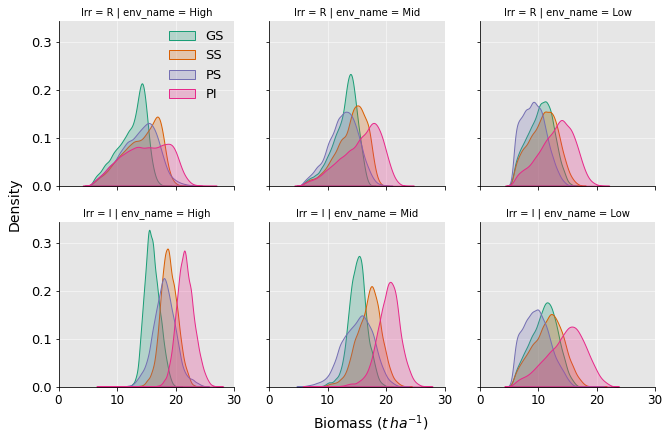

In [185]:
#Density plot#

dfa3.loc[dfa3.cultivar == 0, 'cv'] = "GS"
dfa3.loc[dfa3.cultivar == 1, 'cv'] = "SS"
dfa3.loc[dfa3.cultivar == 2, 'cv'] = "PS"
dfa3.loc[dfa3.cultivar == 3, 'cv'] = "PI"

dfa3.loc[dfa3.irr == 1, 'Irr'] = "R"
dfa3.loc[dfa3.irr == 2, 'Irr'] = "I"

g = sns.FacetGrid(dfa3, col="env_name", row='Irr', hue="cv",hue_order= ['GS','SS','PS','PI'], col_order=['High','Mid','Low'], sharey=True, height=3,
                  aspect=1, palette='Dark2')

g.map(sns.kdeplot,"biomass2",shade=True, zorder=2)

g.add_legend(fontsize=13,title=False,bbox_to_anchor=(0.31, 0.84))
g.set_xlabels("")
axes = g.axes.flatten()

axes[0].yaxis.set_tick_params(labelsize=13)
axes[3].yaxis.set_tick_params(labelsize=13)
axes[3].set_xlim(0,30)
axes[3].xaxis.set_tick_params(labelsize=12)
axes[3].xaxis.set_major_locator(ticker.MultipleLocator(10))
axes[4].set_xlim(0,30)
axes[4].xaxis.set_tick_params(labelsize=12)
axes[4].xaxis.set_major_locator(ticker.MultipleLocator(10))
axes[5].set_xlim(0,30)
axes[5].xaxis.set_tick_params(labelsize=12)
axes[5].xaxis.set_major_locator(ticker.MultipleLocator(10))

axes[0].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[0].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[0].patch.set_facecolor('0.90')
axes[1].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[1].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[1].patch.set_facecolor('0.90')
axes[2].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[2].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[2].patch.set_facecolor('0.90')
axes[3].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[3].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[3].patch.set_facecolor('0.90')
axes[4].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[4].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[4].patch.set_facecolor('0.90')
axes[5].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[5].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[5].patch.set_facecolor('0.90')

g.fig.text(0.5, 0, 'Biomass ($t\,ha^{-1}$)', ha='center', fontsize =14)
g.fig.text(-0.01, 0.52, 'Density', va='center', rotation='vertical', fontsize =14)
g.fig.subplots_adjust(wspace=0.2, hspace=0.22)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\density.png', dpi=300, bbox_inches='tight', pad_inches=0)
hide_toggle()

<ipython-input-214-ce5d73a2bf0d>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
No handles with labels found to put in legend.


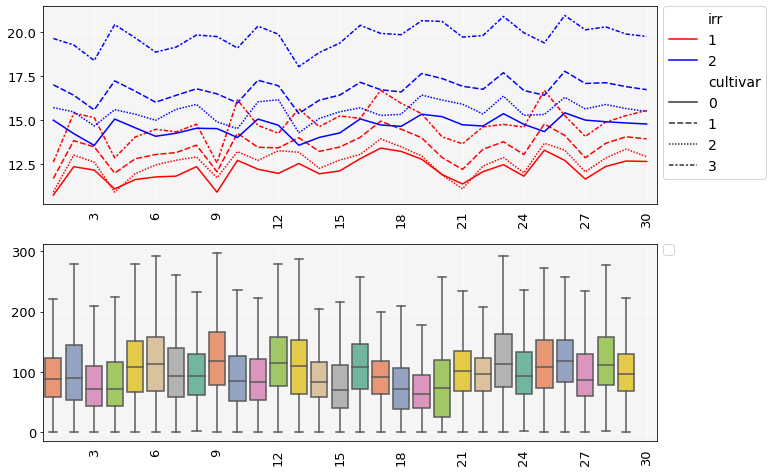

In [214]:
#Biomass vs year#

fig= plt.figure(figsize=(11,8))

ax=plt.subplot(2,1, 1)

ax = sns.lineplot(x="time", y="biomass2",hue="irr", style="cultivar", estimator=np.mean, data=df,
                  ci=95, err_style="band", palette=['r','b'])

# Formatting graph and background
plt.legend(prop=dict(size=14),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylabel('', fontsize =15)
plt.xlabel('', fontsize =25)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=13)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
#ax.set_ylim([10.1,21.9])
ax.set_xlim([0.5,30.5])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

ax=plt.subplot(2, 1, 2)

ax = sns.boxplot(x="time", y="rainHarv", data=df, palette='Set2',showfliers = False)

# Formatting graph and background
plt.legend(prop=dict(size=14),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylabel('', fontsize =15)
plt.xlabel('', fontsize =25)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=13)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
#ax.set_ylim([200,500])
ax.set_xlim([0.5,30.5])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

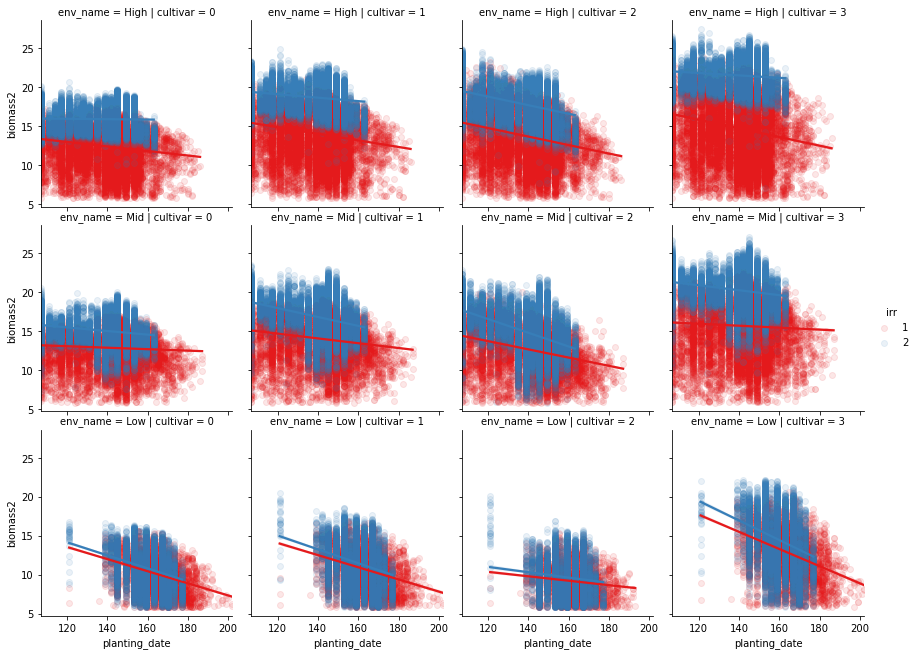

In [218]:
dfa3['AET/ET0'] = dfa3['actual_ET']/dfa3['potential_ET']
sns.lmplot(x="planting_date", y="biomass2",hue='irr',row='env_name',col='cultivar', data=dfa3, palette='Set1',scatter_kws={'alpha':0.1}, height=3)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

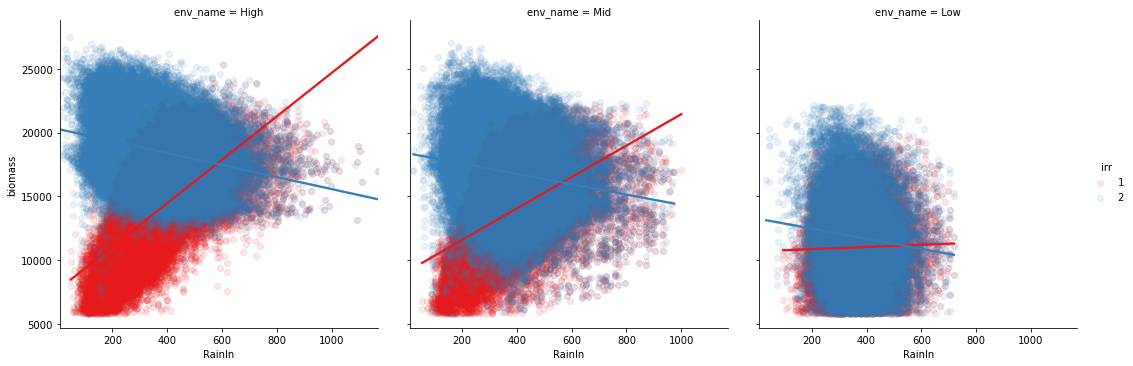

In [217]:
sns.lmplot(x="RainIn", y="biomass",hue='irr',col='env_name', data=dfa3, palette='Set1',scatter_kws={'alpha':0.1})
plt.subplots_adjust(wspace=0.1, hspace=0)

In [ ]:
#Plotting FloweringDas

map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.FloweringDAS.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', col='irr', row='scen_new', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=0, vmax=130,
    figsize=(13,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Flowering Date (DAS)"}, zorder=1)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    area(ax, value, "white")
    gl.top_labels = False
    gl.left_labels = True
    gl.right_labels =False
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80])
    gl.ylocator = mticker.FixedLocator([25, 35, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    
for value in iso3 :
    area(ax, value, "white")
    
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [ ]:
#Plotting MaxLAI

map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.MaxLAI.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', col='irr', row='scen_new', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, #vmin=7000, vmax=20000,
    figsize=(13,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "LAI"}, zorder=1)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    area(ax, value, "white")
    gl.top_labels = False
    gl.left_labels = True
    gl.right_labels =False
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80])
    gl.ylocator = mticker.FixedLocator([25, 35, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    
for value in iso3 :
    area(ax, value, "white")
    
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [ ]:
#Plotting biomass

map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.DaysAfterSowing.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', col='irr', row='scen_new', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=80, vmax=150,
    figsize=(10,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Harvest Date (DAS)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.axis("off")
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0, hspace=-0.5)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=25, label='Harvest Date (DAS)')
    
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)